# **Project Name** - ML Classification Project: Insurance Cross Sell Prediction
<h3 align="center">(by Aiman Sahay)</h3>

##### **Project Type**    - Classification
##### **Contribution**    - Individual: Aiman Sahay

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Library Installation
!pip uninstall scikit-learn -y
!pip install -U scikit-learn

!pip install imbalanced-learn

In [13]:
# Data Manipulation
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 100)

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import missingno as msno

# Statistical Analysis
import scipy.stats as stats
from scipy.stats import chi2
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import boxcox
from scipy.stats import levene

# Feature Selection and Data Preparation (Scaling, Balancing, Splitting)
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from imblearn.over_sampling import SMOTE
from collections import Counter

# ML Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

# Miscellaneous
import time
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [99]:
# Load Dataset

df = pd.read_csv('TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [100]:
# Dataset First Look
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [101]:
# Dataset Rows & Columns count
df.shape

(381109, 12)

### Dataset Information

In [102]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [103]:
# Dataset Duplicate Value Count
duplicates = df.duplicated().sum()
print(f'Number of duplicate rows in the dataset: {duplicates}')

Number of duplicate rows in the dataset: 0


#### Missing Values/Null Values

In [104]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print(f'Missing values in the dataset:\n{missing_values}.')

Missing values in the dataset:
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64.


**Function to set x-axis, y-axis labels and title for multiple subplots**

In [18]:
# Function for setting x, y labels and titles for multiple subplots.

def plot_labels(xlabel, ylabel, title, axes_obj, axes_loc):
    '''
    This function is used to set x, y labels and titles to multiple subplots plotted as an axis object.
    
    Args:
        xlabel - str: X label text for the plot.
        ylabel - str: Y label text for the plot.
        title - str: Title for the plot.
        axes_obj: Name of the axes object
        axes_loc - int: Index location of the plot.
        
    Returns:
        xlabel, ylabel and title for the subplot.
    '''
    
    # Flatten the axes to access the subplot.
    axes = axes_obj.flatten()
    # Set labels and title
    axes[axes_loc].set_xlabel(xlabel, fontdict={'fontsize': 14})
    axes[axes_loc].set_ylabel(ylabel, fontdict={'fontsize': 14})
    axes[axes_loc].set_title(title, fontdict={'fontsize': 16,  'fontweight' :'bold'})

**Function to Visualize Missing Values in the Dataset (with plot_labels function)**

In [28]:
# Visualizing the missing values

def show_missing_values(df):
    '''
    This function displays a heatmap and bar chart of missing values in the dataset.
    Note: plot_labels() function should be run first.
    
    Args:
        df: A pandas dataframe object.
        
    Returns:
        Heat Map and Bar Plot of Missing Values. 
    '''
    
    # Set the figure
    fig, axes = plt.subplots(1, 2, figsize=(15,6))
   
    try:
         # Heatmap showing the distribution of null values in the entire dataset.
        sns.heatmap(df.isnull(), ax=axes[0])
        plot_labels("", "", "Heatmap of Missing Values in the Dataset", axes, 0)
        
        # Bar chart displaying the count of non null values.
        msno.bar(df)
        plot_labels("", "", "Bar Plot of Missing Values in the Dataset", axes, 1)
        
    except NameError:
        print("Error: Run 'plot_labels()' function first!")  


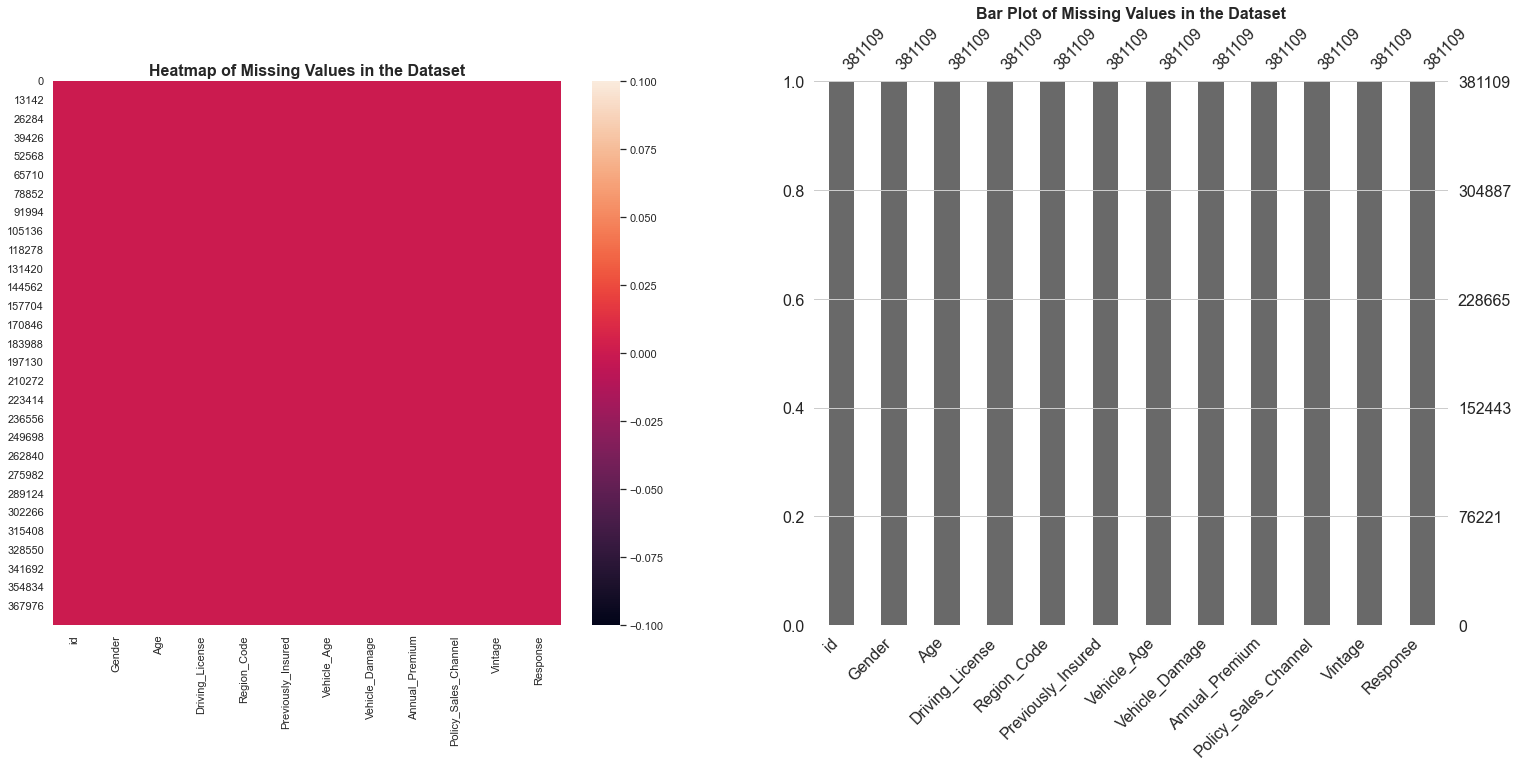

In [105]:
# Visualize missing values

show_missing_values(df)

### What did you know about your dataset?

This dataset is of an Insurance Company which contains information about its existing customers, their vehicle details and insurance premium to understand whether the policyholders (customers) from past year who had bought health insurance will also be interested in Vehicle Insurance provided by the company.

Our task is to analyze this dataset to ultimately build a classification prediction ML model to predict whether the health insurance customers would also be interested in vehicle insurance.

This dataset has 381109 records and 12 features. There are neither any duplicate nor missing values in the dataset.

## ***2. Understanding Your Variables***

In [106]:
# Dataset Columns

df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [107]:
# Dataset Describe

df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Variables Description

> **ID:** (Continuous) - Unique identifier for the Customer.

> **Age:** (Continuous) - Age of the Customer.

> **Gender:** (Dichotomous) - Gender of the Customer.

>  **Driving_License:** (Dichotomous) - 0 for customer not having DL, 1 for customer having DL.

> **Region_Code:** (Nominal) - Unique code for the region of the customer.

> **Previously_Insured:** (Dichotomous) - 0 for customer not having vehicle insurance, 1 for customer having vehicle insurance.

> **Vehicle_Age:** (Nominal) - Age of the vehicle.

> **Vehicle_Damage:** (Dichotomous) - Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

> **Annual_Premium:** (Continuous) - The amount customer needs to pay as premium in the year.

> **Policy_Sales_Channel:** (Nominal) - Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

> **Vintage:** (Continuous) - Number of Days, Customer has been associated with the company.

> **Response (Dependent Feature):** (Dichotomous) - 1 for Customer is interested, 0 for Customer is not interested. 

### Check Unique Values for each variable.

In [108]:
# Check Unique Values for each variable.

print("Number of unique values in:\n")
for i in df.columns.tolist():
    print(f'{i} : {df[i].nunique()}')

Number of unique values in:

id : 381109
Gender : 2
Age : 66
Driving_License : 2
Region_Code : 53
Previously_Insured : 2
Vehicle_Age : 3
Vehicle_Damage : 2
Annual_Premium : 48838
Policy_Sales_Channel : 155
Vintage : 290
Response : 2


## 3. ***Data Wrangling***

### Data Wrangling Code

We know that there are no missing values or duplicate rows in our dataset. Hence, we do not need to do any manipulation regarding these two aspects.  

We will now analyze each variable on the following basis:
* Meaningfulness (i.e. whether it makes sense to be in the dataset).
* Data Distribution.
* Whether nominal features need to be converted to categorical.

Note: Before we begin with any kind of data manipulation, let us first create a copy of the original dataset.

In [109]:
# Create a copy of the dataset.

data = df.copy()

**Feature: 'Id'**

**Observation:** The "Id" column is just a unique idenfier of each customer and is not significant to our analysis.  
**Solution:** Drop the "Id" column.

In [110]:
# Drop "id" column
data = data.drop('id', axis=1)
data.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

**Feature: 'Age', 'Region_Code' and 'Policy_Sales_Channel'**

1. Independent Distribution.
2. Distribution w.r.t. Target Variable ("Response").

**Function to plot multiple subplots of type - QQplot, PieChart, BoxPlot, ViolinPlot, Histogram, BarPlot, CountPlot**

In [179]:
def multiple_subplots(subplot_list, n_row, n_col, figsize, suptitle, plot_type, df, common_y_variable=None,\
                      target=False, target_var=None, estimator="mean", suptitle_fontsize=16):
    '''
    This function creates multiple subplots of QQPlot, PieChart, BoxPlot, ViolinPlot, Histogram, BarPlot, CountPlot.
    
    Args:
        subplot_list - list : This is a list of all the dataframe variables for which data is to be plotted.
        n_row - int : Number of rows for the subplots.
        n_col - int : Number of columns for the subplots.
        figsize - tuple of int : Tuple mentioning the dimension of the plotting area.
        suptitle - str : Main title or heading of the plot.
        plot_type - str : Type of plot, select from "qqplot", "pie", "boxplot", "violinplot", "histplot", "barplot", "countplot".
        df - Pandas DataFrame Object : A Pandas DataFrame.
        common_y_variable - str: Optional: The common y-variable for plotting bar plots, default=None.
        target - bool: Optional: Boolean value if visualization is required target wise, default=False.
        target_var - str: Optional: The target variable if target is set to "True", default=None.
        estimator - str: Optional: The bar plot estimator, select from "mean" or "sum", defalut="mean".
        suptitle_fontsize - int : Fontsize of the main title, default value = 16
        
    Returns:
        Plotted Graphical Plots in n_row and n_col in an area of the figsize.
    '''
    
    # Define list of plots
    plots = ["qqplot", "pie", "boxplot", "violinplot", "histplot", "barplot", "countplot"]
    
    # List of columns/variables to be plotted.
    lst = subplot_list
    
    # Create subplots with a n_row x n_col layout
    fig, axes = plt.subplots(n_row, n_col, figsize=figsize)
    fig.suptitle(suptitle, fontsize=suptitle_fontsize, fontweight="bold")
    
    # Flatten the axes array to iterate over subplots
    axes = axes.flatten()
    
    # Delete the extra subplot
    if (n_row*n_col) > len(lst):
        n_ax_to_remove = (n_row*n_col) - len(lst)
        for i in range(1, n_ax_to_remove+1):
            fig.delaxes(axes[-i])
        
    # Plot the data
    
    # Raise a NameError if plot_type is not from the available plot_types.
    if plot_type not in plots:
        raise NameError('Plot not available! Please select from ["qqplot", "pie", "boxplot", "violinplot", "histplot", "barplot", "countplot"]')
    
    # Code to plot the different plots.
    try:    
        for i in range(len(lst)):
            if plot_type == "qqplot":
                sm.qqplot(df.loc[:, lst[i]], line='45', ax=axes[i])
            elif plot_type == "pie":
                colors = sns.color_palette('pastel')
                counts = df[lst[i]].value_counts()
                axes[i].pie(counts, labels=counts.index, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
            elif plot_type == "boxplot":
                sns.boxplot(x=target_var if target else None, y=lst[i], data=df, ax=axes[i])
            elif plot_type == "violinplot":
                sns.violinplot(x=target_var if target else None, y=lst[i], data=df, ax=axes[i])
            elif plot_type == "histplot":
                sns.histplot(x=lst[i], data=df, hue=target_var if target else None, ax=axes[i], kde=True)
            elif plot_type == "countplot":
                order = df.groupby(lst[i])[common_y_variable].count().sort_values(ascending=False).index
                sns.countplot(x=lst[i], data=df, hue=target_var if target else None, ax=axes[i], order=order)
            elif plot_type == "barplot":
                if estimator == "mean":
                    order = df.groupby(lst[i])[common_y_variable].mean().sort_values(ascending=False).index
                    sns.barplot(x=lst[i], y=common_y_variable, hue=target_var if target else None, data=df, ax=axes[i], estimator=np.mean, order=order)
                elif estimator == "sum":
                    order = df.groupby(lst[i])[common_y_variable].sum().sort_values(ascending=False).index
                    sns.barplot(x=lst[i], y=common_y_variable, hue=target_var if target else None, data=df, ax=axes[i], estimator=sum, order=order)

            axes[i].set_title(f"{lst[i]}", fontdict={'fontsize':15, 'fontweight':'bold'})
            axes[i].set_xlabel("")
            axes[i].set_ylabel("")
            
    except NameError as e:
        # Catch the error and print the error message.
        print(f"An error occured: {e}")
        
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

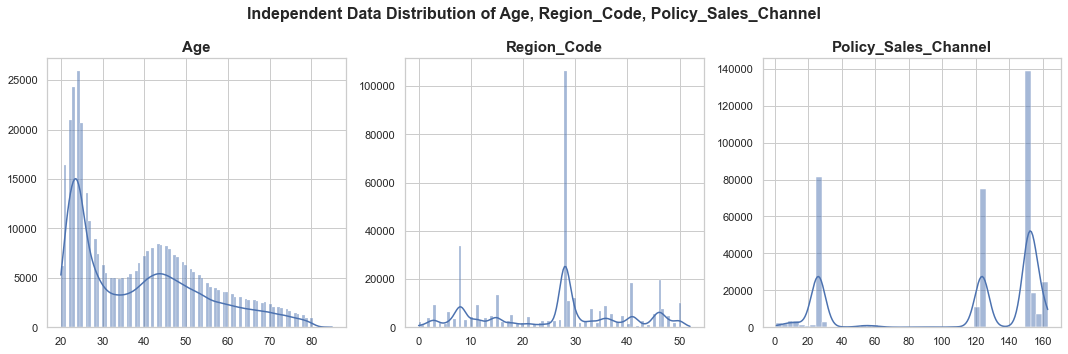

In [111]:
# Independent Distribution

multiple_subplots(["Age", "Region_Code", "Policy_Sales_Channel"], 1, 3, (15,5), \
                  "Independent Data Distribution of Age, Region_Code, Policy_Sales_Channel", "histplot", data)


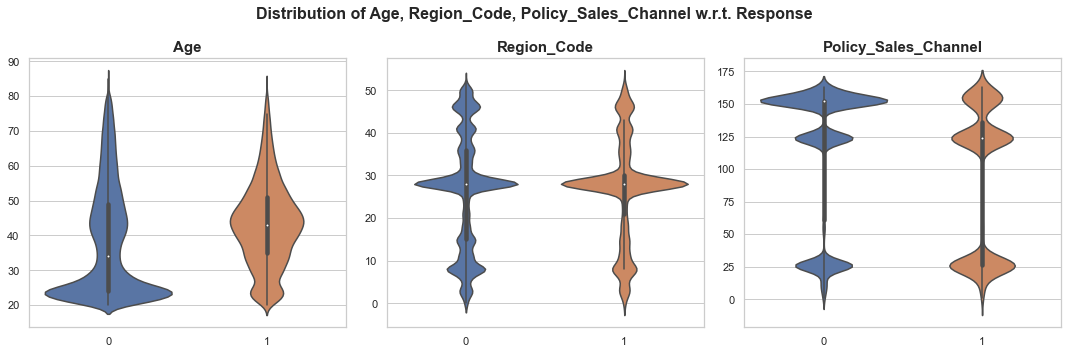

In [112]:
# Distribution w.r.t. Target Variable ("Response)".

multiple_subplots(["Age", "Region_Code", "Policy_Sales_Channel"], 1, 3, (15,5), \
                  "Distribution of Age, Region_Code, Policy_Sales_Channel w.r.t. Response", "violinplot", data, \
                  target=True, target_var="Response")

**Observation:** The distribution of number of customers is very dispersed w.r.t. Age, Region_Code and Policy_Sales_Channel amd the raw numbers for these features do not make much sense.   
**Solution**: We can convert these features into categorical values based on the customer count of each feature divided into different categories.
    
To convert to categorical values, we need to decide on the threshold values for customer count belonging to different categories.

Based on the histogram, we can create the following thresholds:

> **Age Categories**  
20 to 40: YoungAge  
41 to 65: MiddleAge  
$>$ 65: Old Age  

> **Policy_Sales_Channel**  
$>$ 100000: Channel_A  
70001 to 100000: Channel_B  
10001 to 70000: Channel_C  
$\leq$ 10000: Channel_D  

> **Region_Code**  
$>$ 100000: Region_A  
10001 to 100000: Region_B  
5001 to 10000: Region_C  
$\leq$ 5000: Region_D  

**Function to convert numeric data into categorical (Age, Region_Code_ Policy_Sales_Channel)**

In [78]:
def convert_numeric_to_categorical(df):
    '''
    This function converts numeric nominal features into categorical based on defined thresholds.
    
    Args:
        df: A pandas dataframe object.
        
    Returns:
        df: An updated pandas dataframe with the converted categorical features.
    '''
    
    # Age
    data['Age_Category'] = data['Age'].apply(lambda x: 'YoungAge' if 20<x<=40 else 'MiddleAge' if 40<x<=65 else 'OldAge')
    
    # Policy_Sales_Channel
    x = data['Policy_Sales_Channel'].value_counts().apply(lambda x: 'Channel_A' if x>100000 else 'Channel_B' if 70000<x<=100000 else 'Channel_C' if 10000<x<=70000 else 'Channel_D') 
    mapping_dict = dict(zip(x.keys(),x.values))
    data['Policy_Sales_Channel_Categorical'] = data['Policy_Sales_Channel'].map(mapping_dict) 
    
    # Region_Code
    x = data['Region_Code'].value_counts().apply(lambda x: 'Region_A' if x>100000 else 'Region_B' if 10000<x<=100000 else 'Region_C' if 5000<x<=10000 else 'Region_D') 
    mapping_dict = dict(zip(x.keys(),x.values))
    data['Region_Code_Categorical'] = data['Region_Code'].map(mapping_dict) 
    
    return df
    

In [113]:
# Convert numeric nominal data of Age, Region_Code_ Policy_Sales_Channel into specified categories.
convert_numeric_to_categorical(data)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Category,Policy_Sales_Channel_Categorical,Region_Code_Categorical
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,MiddleAge,Channel_B,Region_A
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,OldAge,Channel_B,Region_C
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,MiddleAge,Channel_B,Region_A
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,YoungAge,Channel_A,Region_C
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,YoungAge,Channel_A,Region_B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,OldAge,Channel_B,Region_D
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,YoungAge,Channel_A,Region_C
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,YoungAge,Channel_C,Region_B
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,OldAge,Channel_B,Region_D


In [114]:
# Check the number of unique values in the newly created categories.

print(data.groupby('Age_Category')['Age'].nunique())
print()
print(data.groupby('Policy_Sales_Channel_Categorical')['Policy_Sales_Channel'].nunique())
print()
print(data.groupby('Region_Code_Categorical')['Region_Code'].nunique())

Age_Category
MiddleAge    25
OldAge       21
YoungAge     20
Name: Age, dtype: int64

Policy_Sales_Channel_Categorical
Channel_A      1
Channel_B      2
Channel_C      2
Channel_D    150
Name: Policy_Sales_Channel, dtype: int64

Region_Code_Categorical
Region_A     1
Region_B     7
Region_C    10
Region_D    35
Name: Region_Code, dtype: int64


In [115]:
# Check the number of customers belonging to each of these categories.

print(data['Age_Category'].value_counts())
print()
print(data['Policy_Sales_Channel_Categorical'].value_counts())
print()
print(data['Region_Code_Categorical'].value_counts())


YoungAge     210392
MiddleAge    136416
OldAge        34301
Name: Age_Category, dtype: int64

Channel_B    153695
Channel_A    134784
Channel_D     60190
Channel_C     32440
Name: Policy_Sales_Channel_Categorical, dtype: int64

Region_B    118696
Region_A    106415
Region_D     84147
Region_C     71851
Name: Region_Code_Categorical, dtype: int64


**Observation:** Most of the customers are young to middle-aged, belong to regions A and B and were contacted through channels A and B.

**Observation:** We now do not need "Age", "Region_Code" and "Policy_Sales_Channel" columns as these have been converted into meaningful categories.  
**Suggestion:** Drop the above three features from the dataset.

In [118]:
data = data.drop(['Age', 'Region_Code', 'Policy_Sales_Channel'], axis=1)

**Feature: 'Driving_License'**

In [96]:
def calculate_proportions(df, feature):
    '''
    This function calculates the proportion of each category in a categorical feature.
    
    Args:
        df: A pandas dataframe object.
        feature: The feature name.
        
    Returns:
        df: A dataframe of category proportions.
    '''

    prop_df = pd.DataFrame(df[feature].value_counts())
    prop_df["Proportion"] = [round((prop_df[feature][i] / prop_df[feature].sum()) * 100, 2) \
                                 for i in prop_df.index] 
    return prop_df

In [116]:
# Display the proportion of customers with and without a driving license.
calculate_proportions(data, "Driving_License")

,Driving_License,Proportion
1,380297,99.79
0,812,0.21


**Observation:** The proportion of customers without a driving license is just 0.21% which is rather insignificant implying that only the customers with a driving license would have a vehicle and would need a vehicle insurance.  
**Suggestion:** "Driving_License" does not provide any significant information and hence, should be dropped.

In [117]:
# Drop the "Driving_License" column
data = data.drop("Driving_License", axis=1)

**Note:** All the other features could be significant to our analysis. We will keep them for now and decide on how to manipulate those later while doing EDA.

In [119]:
# Final list of columns and data view

data.columns

Index(['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Annual_Premium', 'Vintage', 'Response', 'Age_Category',
       'Policy_Sales_Channel_Categorical', 'Region_Code_Categorical'],
      dtype='object')

In [120]:
data.head()

,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,Age_Category,Policy_Sales_Channel_Categorical,Region_Code_Categorical
0,Male,0,> 2 Years,Yes,40454.0,217,1,MiddleAge,Channel_B,Region_A
1,Male,0,1-2 Year,No,33536.0,183,0,OldAge,Channel_B,Region_C
2,Male,0,> 2 Years,Yes,38294.0,27,1,MiddleAge,Channel_B,Region_A
3,Male,1,< 1 Year,No,28619.0,203,0,YoungAge,Channel_A,Region_C
4,Female,1,< 1 Year,No,27496.0,39,0,YoungAge,Channel_A,Region_B


### What all manipulations have you done and insights you found?

The following table summarizes the manipulations done to the original dataset:

<div style="text-align: center; font-size: 15px; font-weight: bold;">Data Manipulation</div>

| Original Dataset Feature | Processed Dataset Feature | Reason (Insights) |
|:-----: | :-----: |  :-----: |
| Id | Feature Dropped | Not meaningful being just a unique identifier of each customer. |
| Driving_License | Feature Dropped | Not significant as almost all customers have a driving license. |
| Age | Feature Dropped and New Feature Created: Age_Category | Raw numbers were not meaningful, hence converted into distinct categories. |
| Region_Code | Feature Dropped and New Feature Created: Region_Code_Categorical | Raw numbers were not meaningful, hence converted into distinct categories. |
| Policy_Sales_Channel | Feature Dropped and New Feature Created: Policy_Sales_Channel_Categorical | Raw numbers were not meaningful, hence converted into distinct categories. |



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Pie Chart

**Feature: Response**

Let us first check the proportion of customers interested and not interested in buying vehicle insurance.

In [125]:
calculate_proportions(data, "Response")

,Response,Proportion
0,334399,87.74
1,46710,12.26


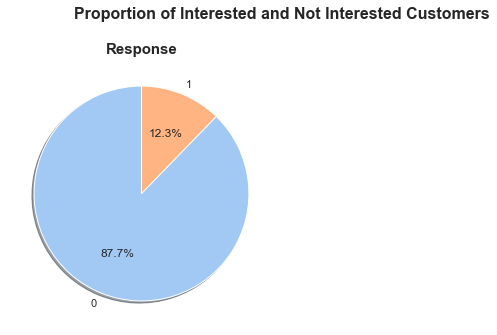

In [142]:
# Visualize proportions of Response

multiple_subplots(["Response"], 1, 2, (8, 5), "Proportion of Interested and Not Interested Customers", "pie", data)

##### 1. Why did you pick the specific chart?

To start the EDA, we first need to understand the proportion of categories of the binary target variable, viz. "Response" in our dataset. This is important because "Response" tells us whether customers are interested or not interested in buying the vehicle insurance and hence we can now explore the data w.r.t. "Response" on the basis of the following:

1. **Demographics:** Gender, Age_Category, Region_Code_Categorical
2. **Vehicle Characteristics:** Vehicle_Age, Vehicle_Damage
3. **Insurance:** Previously_Insured, Annual_Premium   
4. **Association with the company:** Vintage, Policy_Sales_Channel_Categorical

##### 2. What is/are the insight(s) found from the chart?

Only 12.3% of the customers are interested in purchasing the vehicle insurance. It is therefore important to analyze the data separately for each of the "Response" classes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

To answer this question, we need to analyze the independent features separately in the manner as mentioned above. We will now proceed to do just that.

#### Chart - 2 - Count Plot

**Demographics: Feature - Gender, Age_Category**

In [173]:
def show_count_catplot(df, feature, figsize, col, aspect, col_wrap, suptitle, title_plot_adjust, between_plot_adjust=None, \
                       hue=None, order=None, height=6):
    '''
    This function shows a countplot for multiple variables simultaneously.
    
    Args:
        df - Pandas DataFrame Object: A Pandas Dataframe.
        feature: The feature to be plotted on the x-axis.
        figsize - tuple of int: Tuple containing the dimension of the plotting area.
        col: The feature whose categories are to be plotted column wise.
        aspect - float: The aspect ratio.
        col_wrap - int: Number of columns to be plotted on each row.
        suptitle - str: The main title for whole plot.
        title_plot_adjust - float: Space adjustment value between suptitle and plot.
        between_plot_adjust - float (Optional): Space adjustment value between two plots, default=None
        hue (Optional): Additional feature to analyze in each plot, default=None
        order (Optional): order of bars, default=None
        height - int (Optional): Height of plots, default=6
        
    Returns:
        Multi-dimensional Count Plot.
    '''
    
    # Set the figure
    plt.figure(figsize=figsize)
    
    # Plot the chart
    sns.catplot(x=feature, data=df, kind="count", hue=hue, col=col, height=height, aspect=aspect, col_wrap=col_wrap)
    
    # Set title and adjustments
    plt.suptitle(suptitle, fontsize=18, fontweight="bold")
    plt.subplots_adjust(top=title_plot_adjust)
    plt.subplots_adjust(hspace=between_plot_adjust)
    
    # Show the plot
    plt.show()

<Figure size 1080x576 with 0 Axes>

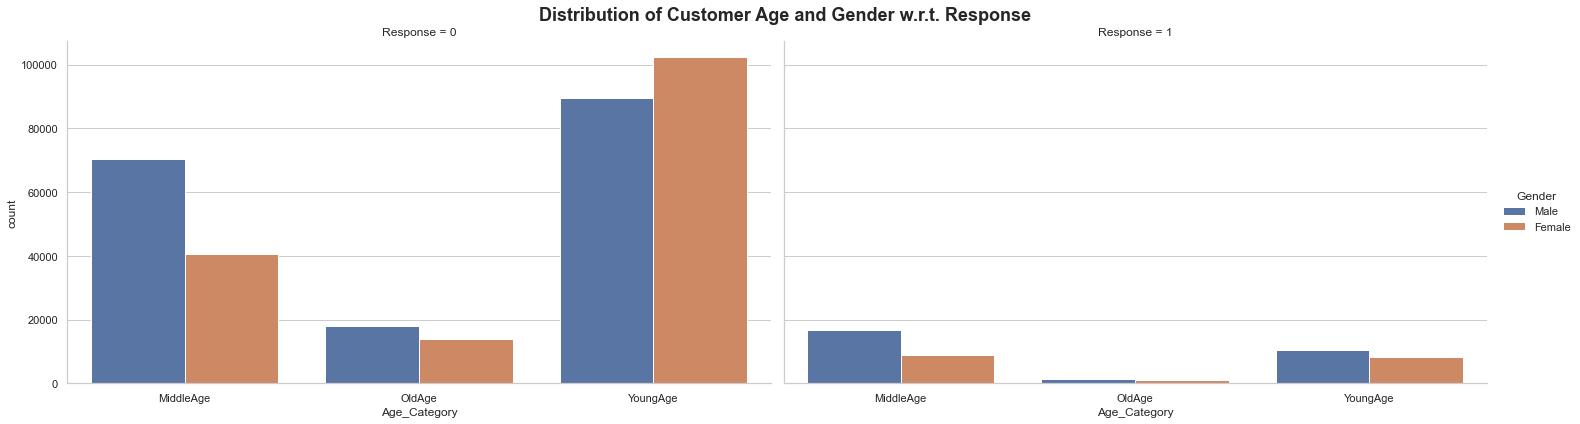

In [178]:
# Chart - 2 visualization code

show_count_catplot(data, "Age_Category", (15,8), "Response", 1.75, 2, \
                   "Distribution of Customer Age and Gender w.r.t. Response", 0.9, hue="Gender")


##### 1. Why did you pick the specific chart?

We want to understand the distribution of customer demographics, viz. Age and Gender w.r.t Response. A countplot used in this way helps to analyze the distribution multiple variables simultaneously.

##### 2. What is/are the insight(s) found from the chart?

**On the basis of "Gender":**
* For customers who are interested, males are more than females in all age groups.
* For customers who are not interested, males are more than females in all age groups except "YoungAge" where females are higher. 

**On the basis of "Age_Category:**
* Customers in the middle age group are more interested in buying the insurance among all the age categories as these customers have a higher proportion in the 'interested' reponse and lower proportion in the 'not interested' response.
* It is however also important to note that even though the middle age group has the highest proportion, the young age group has also shown some interest in buying the insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Recommendation for positive business impact:**  As a first step, the company should focus on Middle Aged, Male customers, then on Young, Male customers, then on Female customers in both the "Response" categories and lastly on Old Aged customers.

#### Chart - 3 - Count Plot

**Demographics: Feature - Region_Code_Categorical**

<Figure size 1080x576 with 0 Axes>

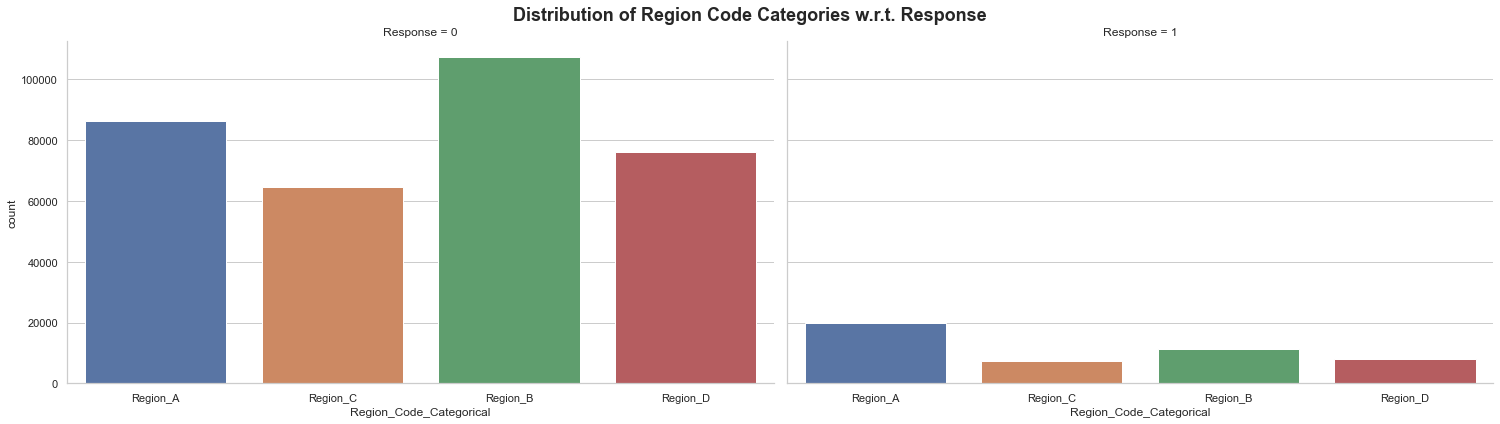

In [175]:
# Chart - 3 visualization code

order = data['Region_Code_Categorical'].value_counts().index
show_count_catplot(data, "Region_Code_Categorical", (15,8), "Response", 1.75, 2, \
                   "Distribution of Region Code Categories w.r.t. Response", 0.9, order=order)

The highest number of customers however come from Region_A and Region_B and these customers have also shown the most interest, followed by Region_C and D customers equally.

Conclusion: The company should focus on customers in Region_A and B first and then on Region C and D as they have a higher chance of being prospective customers. 

##### 1. Why did you pick the specific chart?

We want to understand the distribution of customer demographics, viz. Region_Code_Categorical w.r.t Response. A countplot used in this way helps to analyze the distribution w.r.t. each target category efficiently.

##### 2. What is/are the insight(s) found from the chart?

The highest number of all customers as well as interested ones belong to Region A and B followed by Region C and D customers equally.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Recommendation for positive business impact:**
The company should focus on customers in Region A and B first and then on Region C and D as they have a higher chance of being prospective customers. 

#### Chart - 4 - Count Plot

**Demographics: Feature - Gender, Age_Category, Region_Code_Categorical (Combined)**

<Figure size 1080x1080 with 0 Axes>

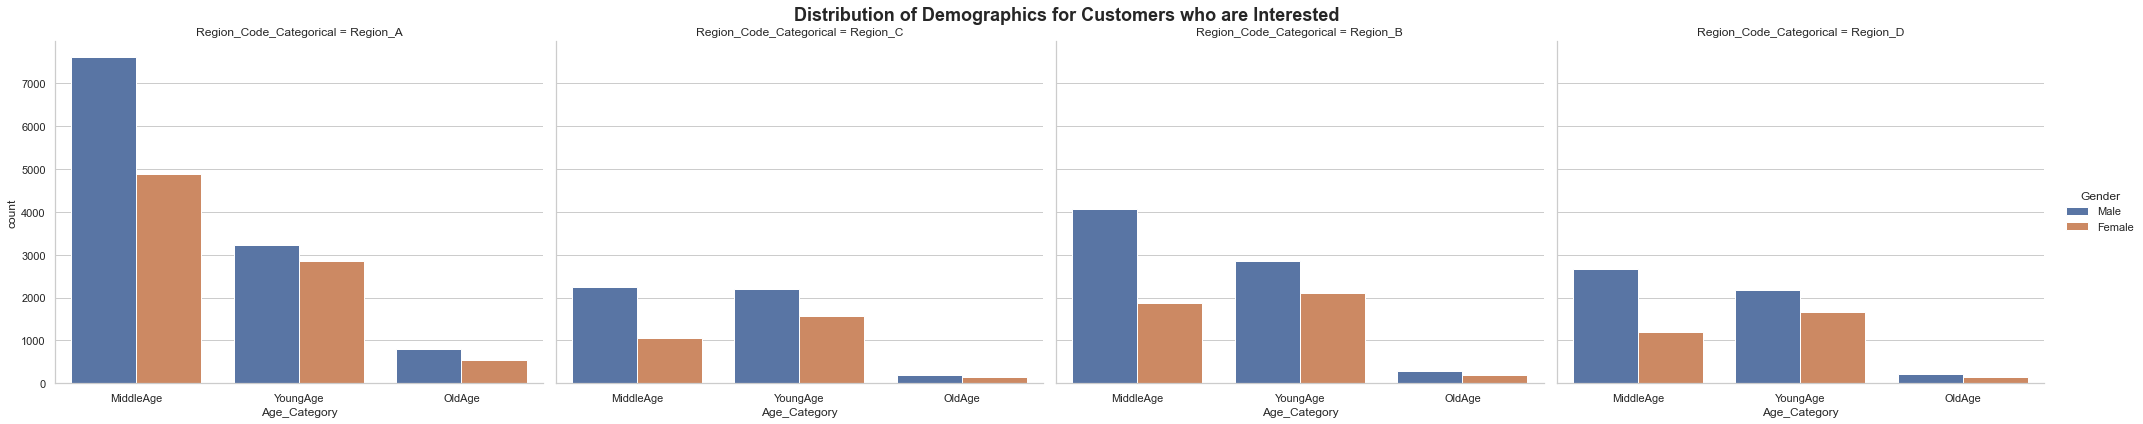

<Figure size 1080x1080 with 0 Axes>

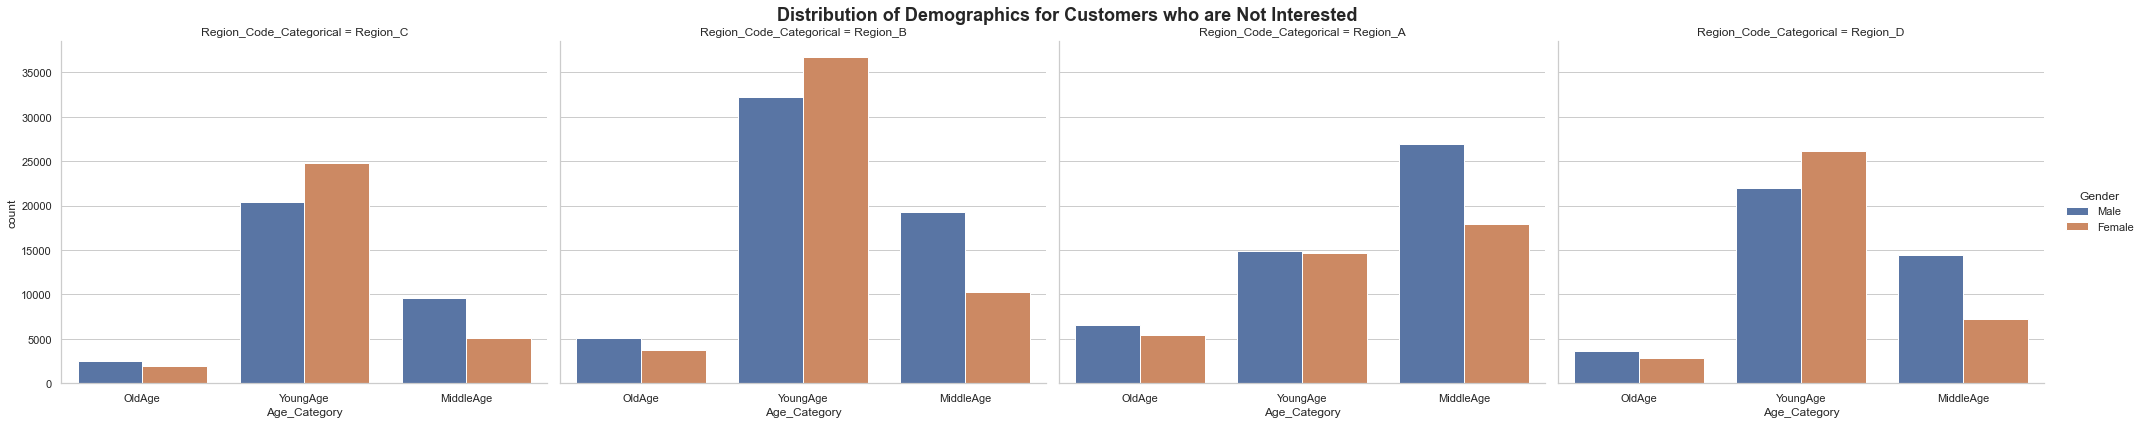

In [174]:
# Reponse = 1
df1 = data[data["Response"]==1]
show_count_catplot(df1, "Age_Category", (15,15), "Region_Code_Categorical", 1.2, 4, \
                   "Distribution of Demographics for Customers who are Interested", 0.9, 0.7, hue="Gender")

# Reponse = 0
df2 = data[data["Response"]==0]
show_count_catplot(df2, "Age_Category", (15,15), "Region_Code_Categorical", 1.2, 4, \
                   "Distribution of Demographics for Customers who are Not Interested", 0.9, 0.7, hue="Gender")

##### 1. Why did you pick the specific chart?

We want to understand the distribution of customer demographics, viz. Age, Gender and Region w.r.t Response. A countplot used in this way helps to analyze the distribution multiple variables simultaneously.

##### 2. What is/are the insight(s) found from the chart?

Highest number of interested customers are the Middle-Aged, Male customers belonging to Regions A and B. Among those who are not interested are Young-Aged, Female customers belonging mostly to Region B.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Recommendation for positive business impact:**
Based on the Demographics alone, the company should first focus on Middle-Aged, Male customers in Regions A and B, then move to the Young and Middle-Aged Male customers in Regions C and D.

#### Chart - 5

In [46]:
# Chart - 5 visualization code

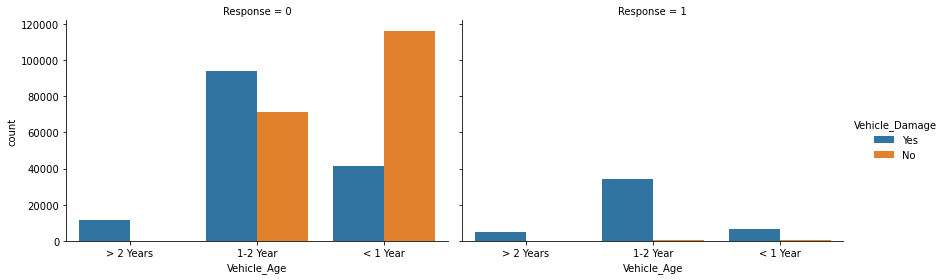

In [35]:
sns.catplot(x='Vehicle_Age', data=data1, kind='count', hue='Vehicle_Damage', col='Response',\
            height=4, aspect=1.5, col_wrap=2)

For customers who are interested in the insurance have mostly had vehicle damage and whose vehicle age is between 1-2 years.  
However, there is also a significant number of customers who have had vehicle damage with 1-2 years of vehicle age but have not shown interest at present.

Recommendation: The company should focus on and try to approach and capture customers who have had vehicle damage and whose vehicle is about 1-2 years old as these are most likely to purchase the insurance. And then focus on customers with vehicle age of < 1 year. Customers with vehicle age > 2 years is not very large and would most likely have an already running insurance, so the company need not focus its resources on this group at present.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

<AxesSubplot:xlabel='Response', ylabel='Annual_Premium'>

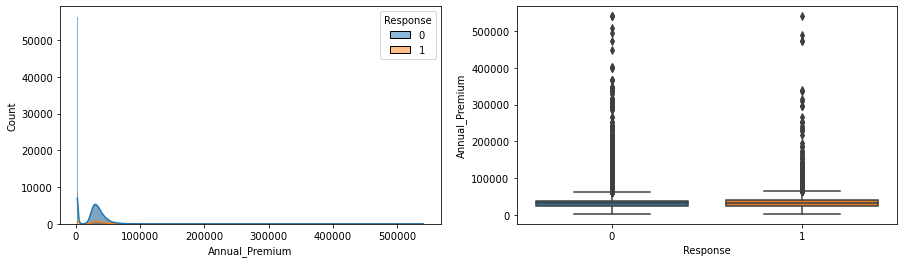

In [36]:
# Let us first analyze the distribution Annual Premium using a histogram and boxplot.

plt.figure(figsize=(15,4))

plt.subplot(121)
sns.histplot(x="Annual_Premium", data=data1, kde=True, hue="Response")

plt.subplot(122)
sns.boxplot(x="Response", y="Annual_Premium", data=data1)

From the above plots, it can be observed that the "Annual_Premium" data is highly positively skewed and there are also many outliers.  

Let us calculate the proportion of outliers to help us gauge the extent of the same. A quick visual check indicates that most of the premium data falls in the region of 0 to 80000. So, let us use this as a threshold to calculate the proportion of outliers. 

Also, let us calculate the proportion of total amount of premium above 80000 and compare this against customers' interest in purchasing the policy. This analysis is important to seggregate high value and low value customers.

In [37]:
premium_outliers_prop_cust = (len(data1[data1["Annual_Premium"] > 80000]) / len(data1)) * 100
print(f"Proportion of customers with Annual Premium > 80000 (Outliers): {round(premium_outliers_prop_cust, 2)}%.")

premium_outliers_prop_amt = (data1.loc[data1["Annual_Premium"] > 80000, "Annual_Premium"].sum() / data1["Annual_Premium"].sum()) * 100
print(f"\nProportion of Annual Premium Amount > 80000 (Outliers): {round(premium_outliers_prop_amt, 2)}%.")

Proportion of customers with Annual Premium > 80000 (Outliers): 0.62%.

Proportion of Annual Premium Amount > 80000 (Outliers): 2.18%.


We can see that neither the proportion of total customers nor the proportion of high-value customers is significant. Hence, we can remove these outliers for the time being using the threshold of 80000 derived through our visual check and analyze the data accordingly.  

Note: Later, we will use more robust techniques such as IQR methods and min-max scaler to handle outliers and normalize our data respectively.

In [38]:
data_with_prem_below_80k = data1[data1["Annual_Premium"] <= 80000]
data_with_prem_below_80k.shape

(378744, 10)

Let us plot the histogram and boxplot again after removing the outliers.

<AxesSubplot:xlabel='Response', ylabel='Annual_Premium'>

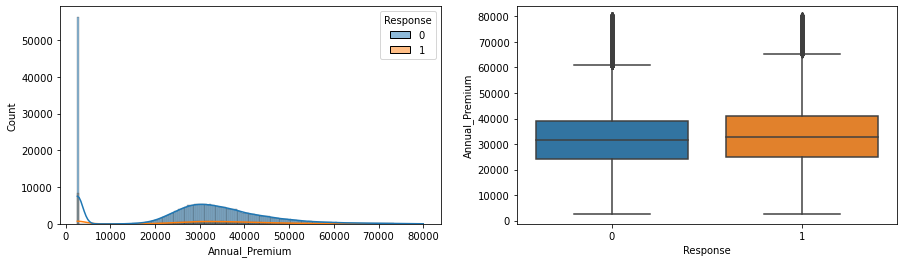

In [39]:
# Let us first analyze the distribution Annual Premium using a histogram and boxplot.

plt.figure(figsize=(15,4))

plt.subplot(121)
sns.histplot(x="Annual_Premium", data=data_with_prem_below_80k, kde=True, hue="Response")

plt.subplot(122)
sns.boxplot(x="Response", y="Annual_Premium", data=data_with_prem_below_80k)

It still seems that a large proportion of premium falls in the range of 0 to 5000 seen as the straight vertical line in the histogram. However, we will not process this further at present but we have to treat this before using this in the ML model training.

Now, based on the "Annual_Premium" above 80000 and "Previously_Insured" data, let us analyze the same w.r.t. "Response.

Text(0.5, 1.0, 'Distribution of Customers Previously Insured, their Mean Annual Premium and Response')

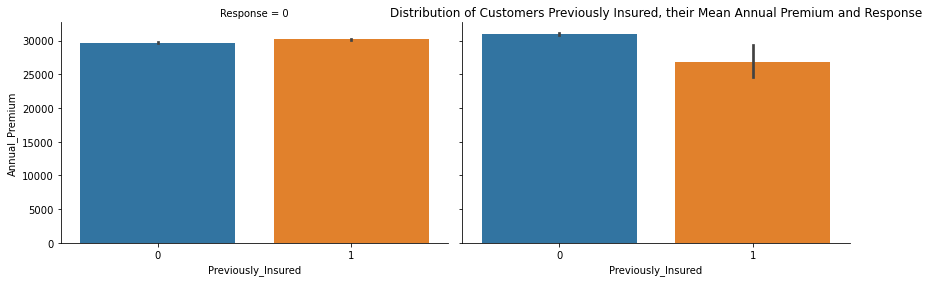

In [40]:
sns.catplot(x='Previously_Insured', y="Annual_Premium", data=data_with_prem_below_80k, kind='bar', col='Response',\
            height=4, aspect=1.5, col_wrap=2)
plt.title("Distribution of Customers Previously Insured, their Mean Annual Premium and Response")

Text(0.5, 0.98, 'Distribution of Customers Previously Insured and Response')

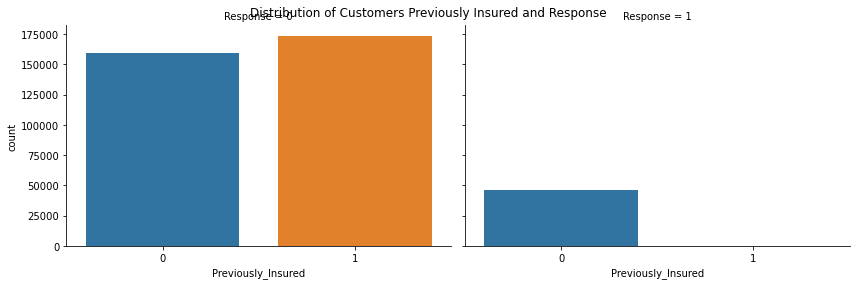

In [41]:
sns.catplot(x='Previously_Insured', data=data_with_prem_below_80k, kind='count', col='Response',\
            height=4, aspect=1.5, col_wrap=2)
plt.suptitle("Distribution of Customers Previously Insured and Response")

From the above two plots related to "Previously_Insured", "Annual_Premium" and "Response", we can observe that an extremely small proportion of customers who were previously insured have shown interest in purchasing the policy and for those customers, the average premium amount is less than the customers who have not been previously insured but have shown interest in buying the policy.  
Also, the average premium amount for customers who have not shown interest in the same irrespective of them being previously insured or not.  
Another interesting and worrying observation is that those who were previously insured and now not shown interest in buying the policy.

Recommendation: It seems that the customers are not happy with the insurance policy amount and service of the company as many customers who were previously insured with the company have failed to show interest in buying the policy (i.e. not repeat customers). This is a worrying scenario. The company needs contact first the previously insured customers and understand their concerns of why they have failed to be their repeat customers. Next, they need to focus on the customers who have shown interest but were not previously insured and offer some incentives to convert them from prospective to actual customers.

Now let us explore the distribution of customer's association with the company and their interest in insurance purchase.

Let us first again see the distribution of "Vintage" to understand the duration of customers' association. 

<AxesSubplot:xlabel='Response', ylabel='Vintage'>

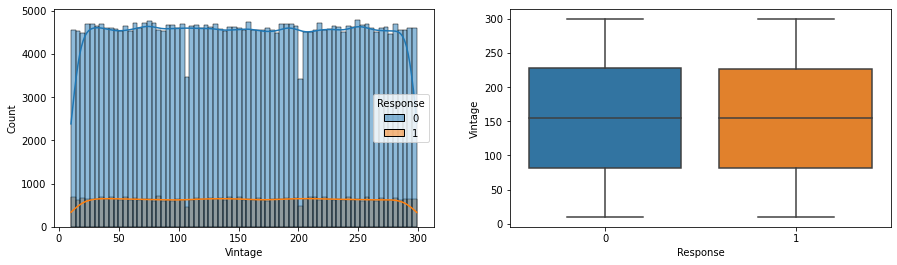

In [42]:
plt.figure(figsize=(15,4))

plt.subplot(121)
sns.histplot(x="Vintage", data=data1, kde=True, hue="Response")

plt.subplot(122)
sns.boxplot(x="Response", y="Vintage", data=data1)

The "Vintage" exhibits almost a uniform distribution and there do not seem to be any outliers too.

It can be inferred that the period of customer's association with the company does not have any impact on his response towards insurance purchase.

Let us now analyze the "Policy_Sales_Channel_Categorical" data to understand its distribution and relationship with customers' response.

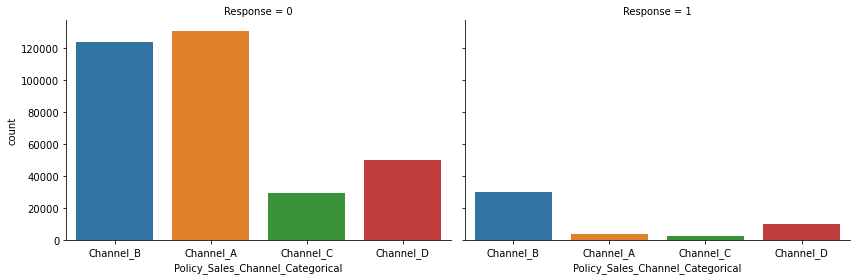

In [43]:
sns.catplot(x='Policy_Sales_Channel_Categorical', data=data1, kind='count', col='Response',\
            height=4, aspect=1.5, col_wrap=2)

In [44]:
# Let us revisit the number of unique channels in each category.
data.groupby("Policy_Sales_Channel_Categorical")["Policy_Sales_Channel"].nunique()

Policy_Sales_Channel_Categorical
Channel_A      1
Channel_B      2
Channel_C      2
Channel_D    150
Name: Policy_Sales_Channel, dtype: int64

From the above plot, it can be seen that "Channel_B" seems to be the most effective as the number of customers who have shown interest is the highest. Even though "Channel_D" is the second highest, it includes 150 channels, it maybe difficult and time consuming to identify the most effective channels amongst those 150.

Recommendation: The company should focus on maximum effective and efficient utilization of Channel B and try to convert the dis-interested customers into potential customers. Next the focus should be on effective Channel A utilization as this constitutes the second most widely used channel and inprove the conversion ratio.

To summarize, our analysis was divided into the following four distinct categories, viz:
1. Demographics: Gender, Age_Category, Region_Code_Categorical
2. Vehicle Characteristics: Vehicle_Age, Vehicle_Damage
3. Insurance: Previously_Insured, Annual_Premium   
4. Association with the company: Vintage, Policy_Sales_Channel_Categorical

Based on this, following is the summary of recommendations to the company for increasing the number the customers who would be interested in buying its vehicle insurance.

1. The company should first focus on Middle-Aged, Male customers in Regions A and B, then move to the Young and Middle-Aged Male customers in Regions C and D.
2. The company should focus on and try to approach and capture customers who have had vehicle damage and whose vehicle is about 1-2 years old as these are most likely to purchase the insurance. And then focus on customers with vehicle age of < 1 year. Customers with vehicle age > 2 years is not very large and would most likely have an already running insurance, so the company need not focus its resources on this group at present.
3. It seems that the customers are not happy with the insurance policy amount and service of the company as many customers who were previously insured with the company have failed to show interest in buying the policy (i.e. not repeat customers). This is a worrying scenario. The company needs contact first the previously insured customers and understand their concerns of why they have failed to be their repeat customers. Next, they need to focus on the customers who have shown interest but were not previously insured and offer some incentives to convert them from prospective to actual customers.
4. The company should focus on maximum effective and efficient utilization of Channel B and try to convert the dis-interested customers into potential customers. Next the focus should be on effective Channel A utilization as this constitutes the second most widely used channel and inprove the conversion ratio.

Based on this analysis alone, the company should focus on the customers with the following characteristics who have not shown interest in purchasing the insurance as they could have a high chance of being converted into potential customers.

1. Middle-Aged, Male, Regions A and B.
2. Have had Vehicle Damage with Vehicle Age 1-2 years.
3. Have been Previously Insured.
4. Contact through Policy Sales Channel B.

In [45]:
# Let us view the proportion of customers who have not shown interest with all the above mentioned characteristics.

reco_cust = data1[(data1["Response"]==0) & (data1["Age_Category"]=="MiddleAge") & (data1["Gender"]=="Male") & \
                  ((data1["Region_Code_Categorical"]=="Region_A") | (data1["Region_Code_Categorical"]=="Region_B")) & \
                  (data1["Vehicle_Damage"]=="Yes") & (data1["Vehicle_Age"]=="1-2 Year") & (data1["Previously_Insured"]==1) & \
                  (data1["Policy_Sales_Channel_Categorical"]=="Channel_B")]

print(f"Number of customers to be approached - Level 1: {len(reco_cust)}")

Number of customers to be approached - Level 1: 1194


The company should identify these 1194 customers first and approach them as they have a high likelihood of becoming potential customers. Then based on the recommendations above, the next subset (Level 2) customers should be approached and so on.

#### Chart - 6

In [47]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [48]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [49]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [50]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [51]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [52]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [53]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [54]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [55]:
# Correlation Heatmap visualization code

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Gender                            381109 non-null  object 
 1   Previously_Insured                381109 non-null  int64  
 2   Vehicle_Age                       381109 non-null  object 
 3   Vehicle_Damage                    381109 non-null  object 
 4   Annual_Premium                    381109 non-null  float64
 5   Vintage                           381109 non-null  int64  
 6   Response                          381109 non-null  int64  
 7   Policy_Sales_Channel_Categorical  381109 non-null  object 
 8   Region_Code_Categorical           381109 non-null  object 
 9   Age_Category                      381109 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 29.1+ MB


<AxesSubplot:>

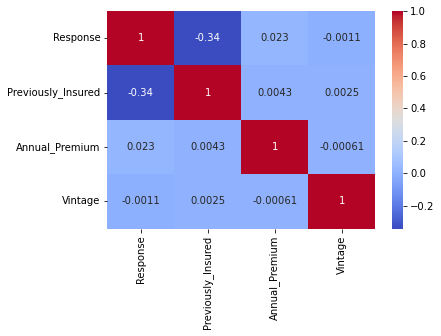

In [56]:
numeric_features=["Response", "Previously_Insured", "Annual_Premium", "Vintage"]

sns.heatmap(data=data1[numeric_features].corr(), cmap="coolwarm", annot=True)

There is no significant correlation amongst any of the numeric features, hence we will keep all of them.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

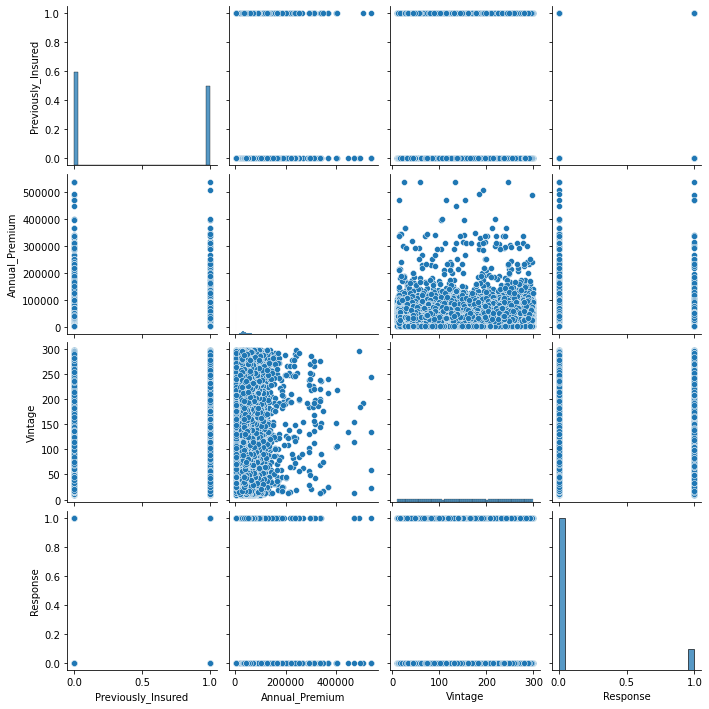

In [57]:
# Pair Plot visualization code
sns.pairplot(data=data1)

The pair plot does not give us any additional information. The only observation is that irrespective of the Vintage, i.e. the number of days association with the company, the Annual Premium is mostly concentrated in the range of 0 to 80000 which is what we have already observed and noted earlier.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

We noticed in the EDA that "Vintage" seems to follow a Uniform Distribution. This means that "Vintage" has no effect on the "Response" feature, i.e. whatever may be the duration of association of customers with the company, their interest in purchasing or not purchasing the insurance remains the same.

To test whether this observation holds true, let us test the hypothesis that "Vintage" follows a Uniform Distribution.

Formulate the Hypothesis:  
$H_0$: "Vintage" follows a Uniform Distribution.  
$H_a$: "Vintage" does not follow a Uniform Distribution.

Visualizing "Vintage" distribution of data.

<AxesSubplot:xlabel='Vintage', ylabel='Count'>

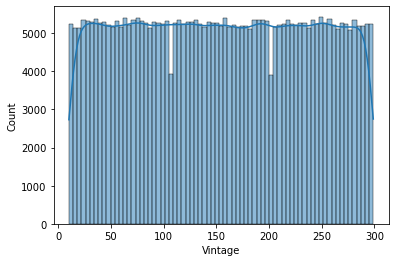

In [58]:
sns.histplot(x="Vintage", data=data1, kde=True)

#### 2. Perform an appropriate statistical test.

Chi-Square Test: The chi-square goodness-of-fit test can be used to test whether the observed frequency distribution of your data matches a specified theoretical distribution, such as a uniform distribution.

Hence, we will use the Chi-Square Test to test our hypothesis of whether the "Vintage" data follows a Uniform Distribution.

Formula to calculate the Chi-Square Statistic:  
$\chi^2 = \Sigma_{i=1}^k \frac {(O_i-E_i)^2}{E_i}$  
where:  
$O_i$ = Observed frequency in bin $i$  
$E_i$ = Expected frequency in bin $i$  
$k$ = Number of bins

In [59]:
# Define bins
num_bins = 5
bins = np.linspace(min(data1["Vintage"]), max(data1["Vintage"]), num_bins + 1)

# Count observations in each bin
observed, _ = np.histogram(data1["Vintage"], bins=bins)

# Calculate expected frequency for each bin under uniform distribution
expected = len(data1["Vintage"]) / num_bins

# Calculate chi-square statistic
chi2_stat = sum((observed - expected)**2 / expected)

# Determine degrees of freedom
df = num_bins - 1

# Calculate p-value
p_val = 1 - chi2.cdf(chi2_stat, df)

# Print results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)

# Compare chi-square statistic with critical value at chosen significance level
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, df=df)
print("Critical Value:", critical_value)

# Test the Hypothesis and print the Result
if chi2_stat > critical_value:
    print("\nReject the null hypothesis: Data does not follow a uniform distribution.")
else:
    print("\nFail to reject the null hypothesis: Data follows a uniform distribution.")


Chi-Square Statistic: 3.0882608387626638
P-value: 0.5431653411434854
Critical Value: 9.487729036781154

Fail to reject the null hypothesis: Data follows a uniform distribution.


##### Which statistical test have you done to obtain P-Value?

We performed the Ch-Square Test to test our Hypothesis and obtain the P-Value.

Conclusion: The P-Value > Significance level ($\alpha$) of 0.05. Hence, we failed to reject the null hypothesis and conclude that the "Vintage" data indeed follows a Uniform Distribution implying that "Vintage" which is the number of days the customers have been associated with the company does not have any effect on the customers' Response.

Note: We can consider dropping this variable later when training the ML Model.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

In the EDA, we noticed that the Annual_Premium data is heavily positively skewed. Let us test the hypothesis whether this data follows a Normal Distribution or not using the Shapiro-Wilk Test.  

Based on the result of this hypothesis test, we will conduct our next hypothesis test and decide whether the data needs to be transformed or not.

Formulate the Hypothesis:  
$H_0$: "Annual_Premium" follows a Normal Distribution.  
$H_a$: "Annual_Premium" does not follow a Normal Distribution.

#### 2. Perform an appropriate statistical test.

In [60]:
# Perform Statistical Test to obtain P-Value

# Get the data
ann_premium = data1["Annual_Premium"]

# Check Normality using Shapiro-Wilk test
_, p_value = shapiro(ann_premium)

# Print p_value
print(f"P-value: {p_value}")

# Test the Hypothesis
alpha = 0.05

if p_value < alpha:
    print("\nReject the null hypothesis: Data does not follow a normal distribution.")
else:
    print("\nFail to reject the null hypothesis: Data follows a normal distribution.")

P-value: 0.0

Reject the null hypothesis: Data does not follow a normal distribution.


##### Which statistical test have you done to obtain P-Value?

We used the Shapiro-Wilk Test to test whether the "Annual_Premium" data follows a Normal Distribution. The test confirms that the data is not normally distributed as we could also gauge from our visualization earlier that the data is heavily positively skewed.

Note: Before performing any further tests such as t-test or analysis, this data needs to be transforemed.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

We noticed in the EDA that the Mean Annual Premium amount of customers with Response=0 and Response=1 is not very different. Let us test the Hypothesis to check whether the difference in Annual Premium for these two categories of customers is statistically significant.

<AxesSubplot:xlabel='Response', ylabel='Annual_Premium'>

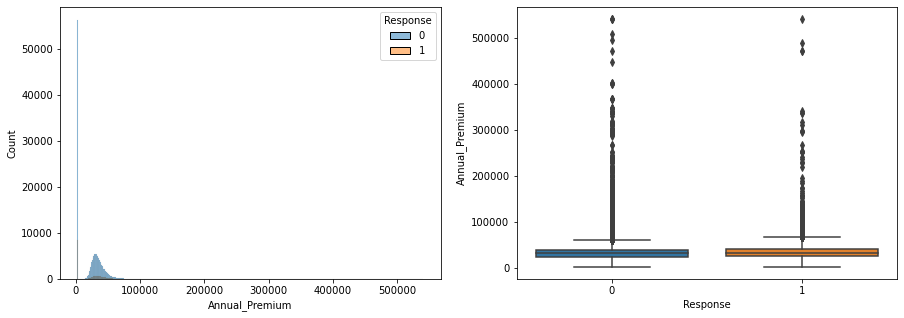

In [61]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.histplot(x="Annual_Premium", data=data1, hue="Response")

plt.subplot(122)
sns.boxplot(x="Response", y="Annual_Premium", data=data1)

#### 2. Perform an appropriate statistical test.

To test our Hypothesis that the Mean Annual Premium between the two categories of Response is the same, we will perform the standard independent samples t-test (if variances of data in the two categories is equal) otherwise Welch's t-test (if variances are unequal).

However, to do this we need to satisfy the following two assumptions:
1. Normally Distributed Data: The annual premium data within each category should ideally follow a normal distribution. While the t-test is robust to violations of normality, deviations may impact the test's accuracy, especially with small sample sizes.  
2. Homogeneity of Variance (Equal Variances): The variances of the annual premium data in the two categories should be equal. This assumption is crucial for the standard t-test; however, Welch's t-test can handle unequal variances.

Formulate the Hypothesis:  
$H_0$: The Mean Annual Premium for both Categories viz. Response=0 and Response=1 is the same.  
$H_a$: The Mean Annual Premium for both Categories viz. Response=0 and Response=1 is different.

In [62]:
# Perform Statistical Test to obtain P-Value

# Separate data by target variable categories
res_cat_0 = data1[data1["Response"] == 0]["Annual_Premium"]
res_cat_1 = data1[data1["Response"] == 1]["Annual_Premium"]

# Check Assumption 1: Normality using Shapiro-Wilk test which we already checked in Hypothesis 2 and concluded that the data is not normally distributed.
# Hence, we will transform the data using box-cox transformation.
# _, p_value_0 = shapiro(res_cat_0)
# _, p_value_1 = shapiro(res_cat_1)

# # If p-value < 0.05, data is not normally distributed, apply transformation
# if p_value_0 < 0.05:
#     res_cat_0, _ = boxcox(res_cat_0)
#     print(f"Assumption 1: The data for Response=0 is not Normally Distributed and hence is now Transformed.")
# else:
#     print(f"Assumption 1: The data for Response=0 is Normally Distributed.")
    
# if p_value_1 < 0.05:
#     res_cat_1, _ = boxcox(res_cat_1)
#     print(f"Assumption 1: The data for Response=1 is not Normally Distributed and hence is now Transformed.")
# else:
#     print(f"Assumption 1: The data for Response=1 is Normally Distributed.")


res_cat_0, _ = boxcox(res_cat_0)
res_cat_1, _ = boxcox(res_cat_1)

    
# Check Assumption 2: Homogeneity of Variances using Levene's test
_, p_value_var = levene(res_cat_0, res_cat_1)


# Perform t-test
t_statistic, p_value = ttest_ind(res_cat_0, res_cat_0, equal_var=(True if p_value_var > 0.05 else False))

# Print results
print("T-test statistic:", t_statistic)
print("P-value:", p_value)

# Compare p-value with significance level to make a decision
alpha = 0.05
if p_value < alpha:
    print("\nReject null hypothesis: Mean annual premiums are different.")
else:
    print("\nFail to reject null hypothesis: Mean annual premiums are the same.")



T-test statistic: 0.0
P-value: 1.0

Fail to reject null hypothesis: Mean annual premiums are the same.


##### Which statistical test have you done to obtain P-Value?

We perfomed Welch's t-test which is a robust t-test that can handle unequal variances. To perform Welch's t-test, we first transformed the "Annual_Premium" data to satisfy the condition of Normality and then calculated the t-statistic and p-value.

The P-Value obtained > Significance level ($\alpha$) of 0.05, hence we failed to reject the null hypothesis and conclude that the mean annual premium for customers in both categories is the same.

##### Why did you choose the specific statistical test?

Since there is no statistically significant difference in the mean annual premium between the two categories, we can conclude that the mean annual premium remains the same irrespective of the customers' response i.e., annual premium has no effect on customers' response.

Note: Later we can consider dropping this feature while building our prediction model.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Note: Since we have already done pre-processing of the dataset earlier, the details for missing values will be displayed below for both the original, un-processed dataset and the processed dataset.

In [63]:
# Handling Missing Values & Missing Value Imputation

# Original dataset
print("Missing Values in Original Dataset:")
print(data.isnull().sum())

# Processed Dataset
print("\nMissing Values in Processed Dataset:")
print(data1.isnull().sum())


Missing Values in Original Dataset:
Gender                              0
Age                                 0
Driving_License                     0
Region_Code                         0
Previously_Insured                  0
Vehicle_Age                         0
Vehicle_Damage                      0
Annual_Premium                      0
Policy_Sales_Channel                0
Vintage                             0
Response                            0
Policy_Sales_Channel_Categorical    0
Region_Code_Categorical             0
Age_Category                        0
dtype: int64

Missing Values in Processed Dataset:
Gender                              0
Previously_Insured                  0
Vehicle_Age                         0
Vehicle_Damage                      0
Annual_Premium                      0
Vintage                             0
Response                            0
Policy_Sales_Channel_Categorical    0
Region_Code_Categorical             0
Age_Category                        0
d

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values in both the original dataset and the processed dataset.

### 2. Handling Outliers

Note: We will use the processed dataset for detecting and handling outliers as this dataset contains all the relevant columns useful for our analysis.

In [64]:
# Handling Outliers & Outlier treatments

data1.columns

Index(['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Annual_Premium', 'Vintage', 'Response',
       'Policy_Sales_Channel_Categorical', 'Region_Code_Categorical',
       'Age_Category'],
      dtype='object')

Since we have only two numerical features in our dataset, viz. "Annual_Premium" and "Vintage", let us look for outliers in these two features only.

<AxesSubplot:ylabel='Annual_Premium'>

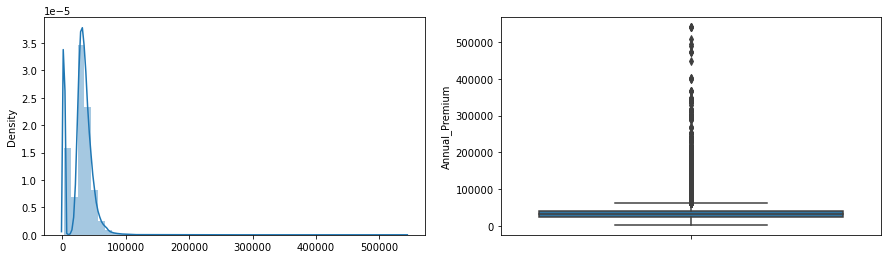

In [65]:
# Annual Premium

plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.distplot(x=data1["Annual_Premium"])

plt.subplot(122)
sns.boxplot(y="Annual_Premium", data=data1)

We had observed earlier too that the "Annual_Premium" data has many outliers and is heavily positively skewed.

We can remove/treat these outliers using the Quantile (IQR) method as we had observed earlier that the proportion of these outliers is not very significant.

In [66]:
Q1 = data1["Annual_Premium"].quantile(0.25)
Q3 = data1["Annual_Premium"].quantile(0.75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# Create a new column to store the values of the treated values of "Annual_Premium"
data1["Annual_Premium_Treated"] = np.where(data1["Annual_Premium"] > upper_whisker, upper_whisker, data1["Annual_Premium"])

<AxesSubplot:ylabel='Annual_Premium_Treated'>

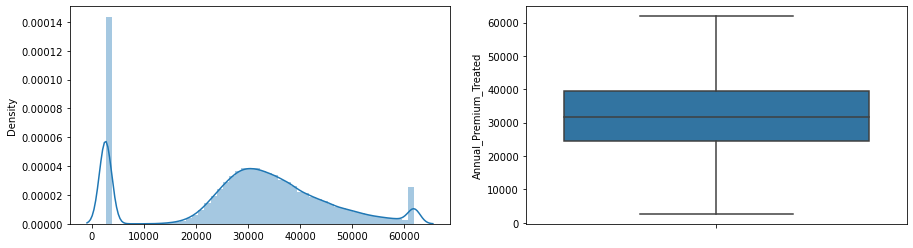

In [67]:
# Let us view the data again.

plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.distplot(x=data1["Annual_Premium_Treated"])

plt.subplot(122)
sns.boxplot(y="Annual_Premium_Treated", data=data1)

The data distribution looks much better now. However, we may still need to scale our data later will be handled later.

We can drop the "Annual_Premium" column from the dataset now since we will be working with "Annual_Premium_Treated" column going forward.

In [68]:
data1 = data1.drop("Annual_Premium", axis=1)

data1.columns

Index(['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Vintage', 'Response', 'Policy_Sales_Channel_Categorical',
       'Region_Code_Categorical', 'Age_Category', 'Annual_Premium_Treated'],
      dtype='object')

<AxesSubplot:ylabel='Vintage'>

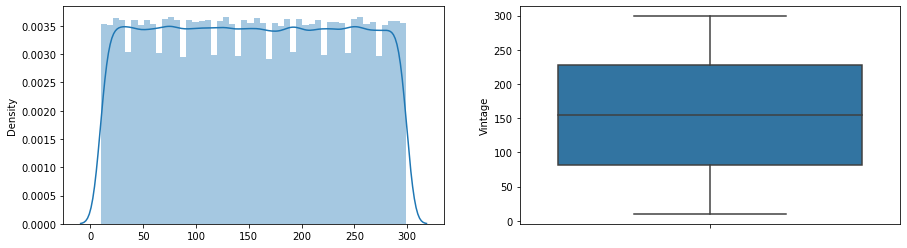

In [69]:
# Vintage

plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.distplot(x=data1["Vintage"])

plt.subplot(122)
sns.boxplot(y="Vintage", data=data1)

There do not seem to be any outliers in the "Vintage" data. Moreover, we have concluded in our hypothesis earlier that "Vintage" follows a normal distribution. We may however need to scale our data which will be handled later.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

One-Hot Encoding:

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

When there is not an ordinal relationship between variables, we use One-Hot Encoding. With One-Hot Encoding the model doesn't assume a natural ordering between categories which may result in poor performance or unexpected results.


In [70]:
# Encode your categorical columns

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Gender                            381109 non-null  object 
 1   Previously_Insured                381109 non-null  int64  
 2   Vehicle_Age                       381109 non-null  object 
 3   Vehicle_Damage                    381109 non-null  object 
 4   Vintage                           381109 non-null  int64  
 5   Response                          381109 non-null  int64  
 6   Policy_Sales_Channel_Categorical  381109 non-null  object 
 7   Region_Code_Categorical           381109 non-null  object 
 8   Age_Category                      381109 non-null  object 
 9   Annual_Premium_Treated            381109 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 29.1+ MB


We will use One-Hot Encoding for categorical features other than binary features as these can be simply encoded as 0 and 1 and thereby prevent the increase in dimensionality of our data.

In [71]:
# Binary Encoding
cols_to_encode_binary = ["Gender", "Vehicle_Damage"]
data_df = data1.copy()
data_df["Gender"] = data_df["Gender"].apply(lambda x: 1 if x == "Male" else 0)
data_df["Vehicle_Damage"] = data_df["Vehicle_Damage"].apply(lambda x: 1 if x == "Yes" else 0)

# One-Hot Encoding
cols_to_encode = ["Vehicle_Age", "Policy_Sales_Channel_Categorical", "Region_Code_Categorical", "Age_Category"]
data_df = pd.get_dummies(data=data_df, columns=cols_to_encode)

data_df.head()

,Gender,Previously_Insured,Vehicle_Damage,Vintage,Response,Annual_Premium_Treated,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Policy_Sales_Channel_Categorical_Channel_A,Policy_Sales_Channel_Categorical_Channel_B,Policy_Sales_Channel_Categorical_Channel_C,Policy_Sales_Channel_Categorical_Channel_D,Region_Code_Categorical_Region_A,Region_Code_Categorical_Region_B,Region_Code_Categorical_Region_C,Region_Code_Categorical_Region_D,Age_Category_MiddleAge,Age_Category_OldAge,Age_Category_YoungAge
0,1,0,1,217,1,40454.0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
1,1,0,0,183,0,33536.0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
2,1,0,1,27,1,38294.0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
3,1,1,0,203,0,28619.0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
4,0,1,0,39,0,27496.0,0,1,0,1,0,0,0,0,1,0,0,0,0,1


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing - Not Applicable
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [72]:
# Expand Contraction

#### 2. Lower Casing

In [73]:
# Lower Casing

#### 3. Removing Punctuations

In [74]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [75]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [76]:
# Remove Stopwords

In [77]:
# Remove White spaces

#### 6. Rephrase Text

In [78]:
# Rephrase Text

#### 7. Tokenization

In [79]:
# Tokenization

#### 8. Text Normalization

In [80]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [81]:
# POS Taging

#### 10. Text Vectorization

In [82]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

We have already manipulated the following features and created new features earlier.

<div style="text-align: center; font-size: 15px; font-weight: bold;">Feature Manipulation</div>

| Original Dataset Feature | Processed Dataset Feature |
|:-----: | :-----: |
| Id | Feature Dropped |
| Age | Feature Dropped and New Feature Created: Age_Category |
| Driving_License | Feature Dropped |
| Region_Code | Feature Dropped and New Feature Created: Region_Code_Categorical |
| Annual_Premium | Feature Dropped and New Feature Created: Annual_Premium_Treated |
| Policy_Sales_Channel | Feature Dropped and New Feature Created: Policy_Sales_Channel_Categorical |


In [83]:
# Manipulate Features to minimize feature correlation and create new features
data.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response',
       'Policy_Sales_Channel_Categorical', 'Region_Code_Categorical',
       'Age_Category'],
      dtype='object')

In [84]:
data1.columns

Index(['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Vintage', 'Response', 'Policy_Sales_Channel_Categorical',
       'Region_Code_Categorical', 'Age_Category', 'Annual_Premium_Treated'],
      dtype='object')

#### 2. Feature Selection

**Numeric Feature Selection**

Let us use Kendall's correlation between the numerical features viz. "Vintage" and "Annual_Premium_Treated".

Note: We do not use Pearson correlation here as the conditions of normality and linear relationship between the variables is not satisfied.

<AxesSubplot:>

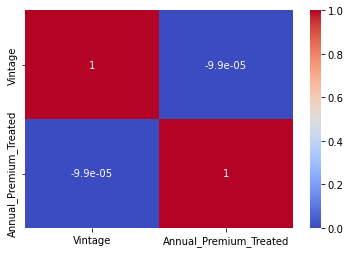

In [85]:
# Select your features wisely to avoid overfitting

numeric_features = ["Vintage", "Annual_Premium_Treated"]

sns.heatmap(data=data1[numeric_features].corr(method="kendall"), cmap="coolwarm", annot=True)

We can see that there is no correlation between these two numerical features, hence we will keep them both in our final dataset.

**Categorical Feature Selection**

Let us see the importance of categorical features using Mutual Information.

To do this, we first need to convert the categorical features into numeric ones.

In [86]:
def make_features_numeric(df):
    global numeric_df
    numeric_df = df.copy()
    numeric_df['Gender'] = numeric_df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
    numeric_df['Age_Category'] = numeric_df['Age_Category'].apply(lambda x: 1 if x == 'YoungAge' else 2 if x == 'MiddleAge' else 3)
    numeric_df['Vehicle_Age'] = numeric_df['Vehicle_Age'].apply(lambda x: 1 if x == '< 1 Year' else 2 if x == '1-2 Year' else 3)
    numeric_df['Vehicle_Damage'] = numeric_df['Vehicle_Damage'].apply(lambda x: 1 if x == 'Yes' else 0)
    numeric_df['Policy_Sales_Channel_Categorical'] = numeric_df['Policy_Sales_Channel_Categorical'].apply(lambda x: 1 if x == 'Channel_A' else 2 if x == 'Channel_B' else 3 if x=='Channel_C' else 4)
    numeric_df['Region_Code_Categorical'] = numeric_df['Region_Code_Categorical'].apply(lambda x: 1 if x == 'Region_A' else 2 if x == 'Region_B' else 3 if x == 'Region_C' else 4)

make_features_numeric(data1)

**Mutual Information**

Mutual information is a concept from information theory that measures the amount of information obtained about one random variable through the observation of another random variable. In the context of feature importance in machine learning, mutual information is used to quantify the relationship between a feature and the target variable.

In feature importance analysis, mutual information can be calculated to assess how much information a particular feature provides about the target variable. Features with high mutual information values are considered more informative and may be more relevant for predicting the target variable.

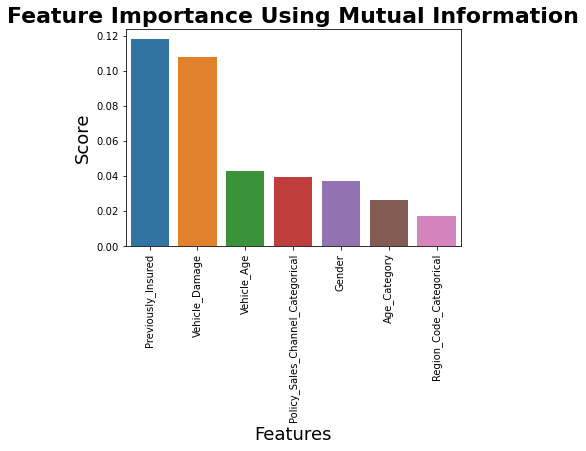

In [87]:
def mutual_info(df):
    # Make a copy of the DataFrame
    X = df.copy()
    
    # Pop the target variable 'Response' from the DataFrame and store it in y
    y = X.pop("Response")
    
    # Drop specified columns from the DataFrame X
    X.drop(columns=['Annual_Premium_Treated', 'Vintage'], inplace=True)
    
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Initialize an empty list to store features with high scores
    high_score_features = []
    
    # Compute the mutual information scores between features and target variable
    feature_scores = mutual_info_classif(x_train, y_train, random_state=0)

    # Initialize empty lists for columns and scores
    column_score = {}
    columns = []
    scores = []
    
    # Iterate through feature scores and sort them in descending order
    for score, f_name in sorted(zip(feature_scores, x_train.columns), reverse=True):
        # Append feature names and scores to respective lists
        columns.append(f_name)
        scores.append(score)
        high_score_features.append(f_name)

    # Store feature names and their corresponding scores in a dictionary
    column_score['Feature'] = columns
    column_score['Score'] = scores

    # Create a DataFrame from the dictionary
    return pd.DataFrame(data=column_score)

def show_feature_importance_through_mi(df):
    sns.barplot(data = mutual_info(df), x = 'Feature', y='Score')
    plt.title('Feature Importance Using Mutual Information', fontdict={'fontsize':22,'fontweight':'bold'})
    plt.xlabel('Features', fontdict={'fontsize':18})
    plt.ylabel('Score', fontdict={'fontsize':18})
    plt.xticks(rotation=90)

show_feature_importance_through_mi(numeric_df)

From the above plot, we can see that "Previously_Insured" and "Vehicle_Damage" have the highest impact on the dependent feature "Response".

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

We have earlier already transformed our data as follows:
1. One-Hot Encoding for all categorical features.
2. Treated outliers using Quantile (IQR) method for "Annual_Premium" feature.

This is how the data looks at present.

In [88]:
# Transform Your data

data_df.head()

,Gender,Previously_Insured,Vehicle_Damage,Vintage,Response,Annual_Premium_Treated,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Policy_Sales_Channel_Categorical_Channel_A,Policy_Sales_Channel_Categorical_Channel_B,Policy_Sales_Channel_Categorical_Channel_C,Policy_Sales_Channel_Categorical_Channel_D,Region_Code_Categorical_Region_A,Region_Code_Categorical_Region_B,Region_Code_Categorical_Region_C,Region_Code_Categorical_Region_D,Age_Category_MiddleAge,Age_Category_OldAge,Age_Category_YoungAge
0,1,0,1,217,1,40454.0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
1,1,0,0,183,0,33536.0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
2,1,0,1,27,1,38294.0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
3,1,1,0,203,0,28619.0,0,1,0,1,0,0,0,0,0,1,0,0,0,1
4,0,1,0,39,0,27496.0,0,1,0,1,0,0,0,0,1,0,0,0,0,1


### 6. Data Scaling

We now need to scale our data, specifically the two numerical variables, "Vintage" and "Annual_Premium".

For this we will use "Min-Max Scaler" to scale it within the 0 to 1 range. We use this normalization technique as most of our data in within this range, so it will perform well with the ML models.

Min-Max scaling preserves the relative relationships between data points while ensuring that the scaled values are within a fixed range. It's particularly useful when the features have different ranges, and you want to bring them to a comparable scale without distorting the original distribution.

In [89]:
# Scaling your data

# def scale_features(df):
scaler = MinMaxScaler()

# Converting the feature data into a 2D array and applying normalization to scale the data.
data_df['Annual_Premium_Treated'] = scaler.fit_transform(data_df['Annual_Premium_Treated'].values.reshape(-1,1))                              
data_df['Vintage_Treated'] = scaler.fit_transform(data_df['Vintage'].values.reshape(-1,1))

In [90]:
data_df.head()

,Gender,Previously_Insured,Vehicle_Damage,Vintage,Response,Annual_Premium_Treated,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Policy_Sales_Channel_Categorical_Channel_A,...,Policy_Sales_Channel_Categorical_Channel_C,Policy_Sales_Channel_Categorical_Channel_D,Region_Code_Categorical_Region_A,Region_Code_Categorical_Region_B,Region_Code_Categorical_Region_C,Region_Code_Categorical_Region_D,Age_Category_MiddleAge,Age_Category_OldAge,Age_Category_YoungAge,Vintage_Treated
0,1,0,1,217,1,0.638245,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0.716263
1,1,0,0,183,0,0.521510,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0.598616
2,1,0,1,27,1,0.601797,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0.058824
3,1,1,0,203,0,0.438540,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0.667820
4,0,1,0,39,0,0.419591,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0.100346


We can now drop the "Vintage" column as we will be using only the "Vintage_Treated" for our model.

In [91]:
data_df = data_df.drop("Vintage", axis=1)

data_df.head()

,Gender,Previously_Insured,Vehicle_Damage,Response,Annual_Premium_Treated,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Policy_Sales_Channel_Categorical_Channel_A,Policy_Sales_Channel_Categorical_Channel_B,Policy_Sales_Channel_Categorical_Channel_C,Policy_Sales_Channel_Categorical_Channel_D,Region_Code_Categorical_Region_A,Region_Code_Categorical_Region_B,Region_Code_Categorical_Region_C,Region_Code_Categorical_Region_D,Age_Category_MiddleAge,Age_Category_OldAge,Age_Category_YoungAge,Vintage_Treated
0,1,0,1,1,0.638245,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0.716263
1,1,0,0,0,0.521510,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0.598616
2,1,0,1,1,0.601797,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0.058824
3,1,1,0,0,0.438540,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0.667820
4,0,1,0,0,0.419591,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0.100346


To confirm whether the scaling is done correctly, let us check the min and max values of these two features.

In [92]:
print(f"Annual_Premium_Treated: Min = {data_df['Annual_Premium_Treated'].min()}, Max = {data_df['Annual_Premium_Treated'].max()}")
print(f"Vintage_Treated: Min = {data_df['Vintage_Treated'].min()}, Max = {data_df['Vintage_Treated'].max()}")

Annual_Premium_Treated: Min = 0.0, Max = 1.0
Vintage_Treated: Min = 0.0, Max = 1.0


The scaling seems to have been done correctly, let us now move to the next step.

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

First let us check whether our data exhibits strong association or correlation among its features. We can do this using Correlation Heatmap (using Pearson correlation).

**Correlation Heatmap (Pearson Correlation)**

<AxesSubplot:>

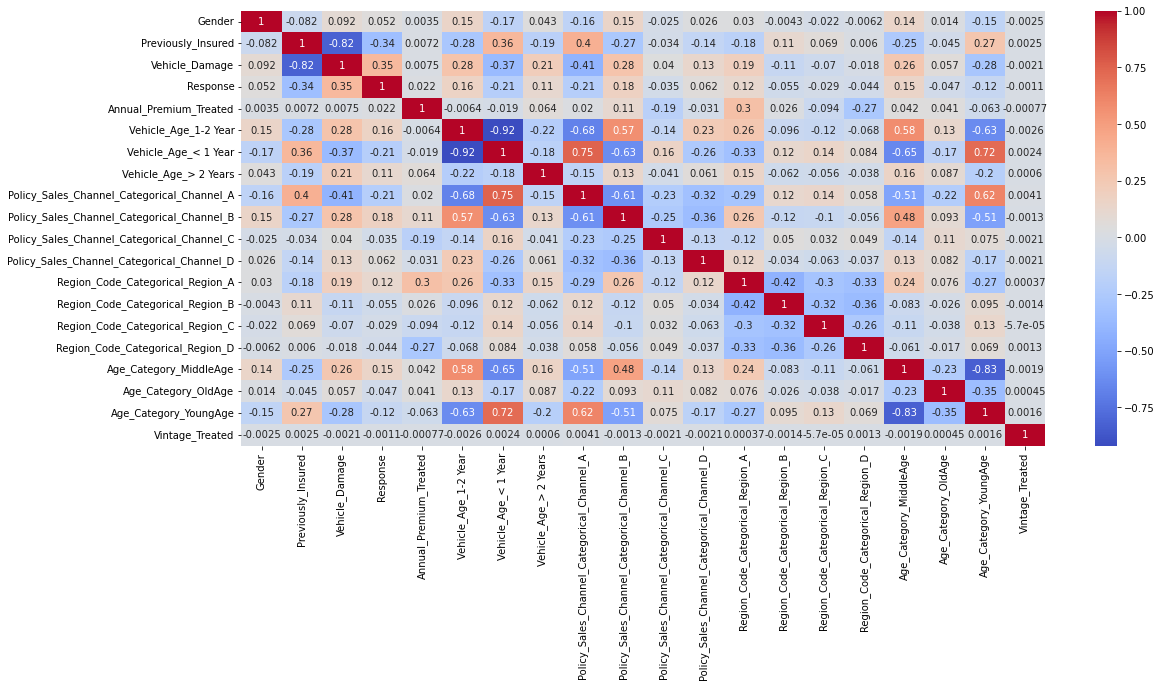

In [93]:
plt.figure(figsize=(18, 8))
sns.heatmap(data_df.corr(), cmap="coolwarm", annot=True)

For the purpose of this analysis, we will consider correlation coefficients > 0.8 or < -0.8 as significant.

Few significant correlations observed are:
* Previously_Insured $\leftrightarrow$ Vehicle_Damage = -0.82
* Vehicle_Age_1-2 Year $\leftrightarrow$ Vehicle_Age_< 1 Year = -0.92
* Age_Category_MiddleAge $\leftrightarrow$ Age_Category_YoungAge = -0.83

Conclusion: To avoid overfitting of data in our model, we could consider removing one of the correlated variables in each of the above 3 categories.
Note: From our Mutual Information visualization, we noticed that "Previously_Insured" and "Vehicle_Damage" were the two most inmporatant features affecting the dependent feature, "Response". However, from the correlation heatmap above we can see that these 2 features are also highly correlated. So we could go ahead removing one of them, let us remove "Vehicle_Damage" as this was the second most important feature.

In Summary, we will remove the following 3 features:
1. Vehicle_Damage
2. Vehicle_Age_< 1 Year
3. Age_Category_YoungAge

In [94]:
data_df = data_df.drop(["Vehicle_Damage", "Vehicle_Age_< 1 Year", "Age_Category_YoungAge"], axis=1)

In [95]:
# Dimensionality Reduction (If needed)

data_df.shape

(381109, 17)

In [96]:
data_df.columns

Index(['Gender', 'Previously_Insured', 'Response', 'Annual_Premium_Treated',
       'Vehicle_Age_1-2 Year', 'Vehicle_Age_> 2 Years',
       'Policy_Sales_Channel_Categorical_Channel_A',
       'Policy_Sales_Channel_Categorical_Channel_B',
       'Policy_Sales_Channel_Categorical_Channel_C',
       'Policy_Sales_Channel_Categorical_Channel_D',
       'Region_Code_Categorical_Region_A', 'Region_Code_Categorical_Region_B',
       'Region_Code_Categorical_Region_C', 'Region_Code_Categorical_Region_D',
       'Age_Category_MiddleAge', 'Age_Category_OldAge', 'Vintage_Treated'],
      dtype='object')

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Analyzing the correlation heatmap using Pearson correlation, we identified the highly correlated independent features using a threshold of 0.8 and dropped those features.

Our final dataset has 17 features and 381109 records.

### 8. Data Splitting

In [97]:
# Split your data to train and test. Choose Splitting ratio wisely.

X = data_df.drop("Response", axis=1)
y = data_df["Response"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (266776, 16)
x_test shape: (114333, 16)
y_train shape: (266776,)
y_test shape: (114333,)


##### What data splitting ratio have you used and why?

A splitting ratio of 30% is chosen in order to have enough data for training as well as testing.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [98]:
# Handling Imbalanced Dataset (If needed)

target_prop = pd.DataFrame(data_df["Response"].value_counts())
target_prop["Proportion"] = [round((target_prop["Response"][i] / target_prop["Response"].sum()) * 100, 2) \
                             for i in target_prop.index] 
target_prop

,Response,Proportion
0,334399,87.74
1,46710,12.26


We see that the ratio of our binary target feature, "Response" 0 and 1 is 88 : 12. This indicates that our dataset is imbalanced.

We will use oversampling with SMOTE to balance our dataset.

In [99]:
# Instantiate the oversampler
oversampler = SMOTE(random_state=40)

# Perform oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

print(f"Original dataset shape: {Counter(y)}")
print(f"Resampled dataset shape: {Counter(y_resampled)}")

Original dataset shape: Counter({0: 334399, 1: 46710})
Resampled dataset shape: Counter({1: 334399, 0: 334399})


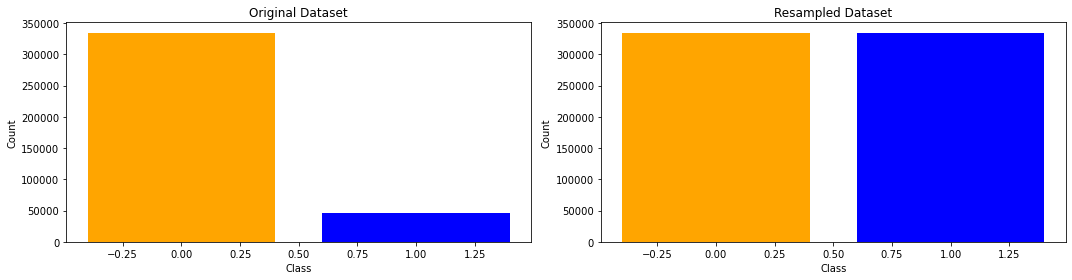

In [100]:
# Plot the original and resampled class distributions
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.bar(Counter(y).keys(), Counter(y).values(), color=['blue', 'orange'])
plt.title('Original Dataset')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.bar(Counter(y_resampled).keys(), Counter(y_resampled).values(), color=['blue', 'orange'])
plt.title('Resampled Dataset')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Our data was imbalanced and even though some of the ML models that we will test later can handle class imbalance, we still balanced our dataset to avoid any bias during model training. 

To achieve this we used the SMOTE (Synthetic Minority Over-sampling Technique) oversampler.

SMOTE is a technique used to address the class imbalance problem in machine learning datasets, particularly in classification tasks. SMOTE helps address the imbalance issue by making the decision boundary more generalizable and less biased towards the majority class. It encourages the classifier to learn from the feature space of the minority class more effectively.

## ***7. ML Model Implementation***

For the ML Implementation, we will train the following models on our resampled, balanced dataset.

* Decision Tree Classifier
* Logistic Regression
* K-Nearest Neighbors (KNN)
* ADA Boost Classifier
* Random Forest Classifier

For Hyperparameter tuning, we have used the following models:

* HalvingRandomSearchCV
* RandomizedSearchCV
* GridSearchCV

Note: All the above hyperparameter tuning methods were used to train a DecisionTreeClassifer and the RandomizedSearchCV method was much faster than GridSearchCV. However, when we used this with AdaBoostClassifier, it took a very long time to train the model as compared to HalvingRandomSearchCV. Hence, HalvingRandomSearchCV method was decided to be used as the hyperparameter tuning method.
Note: In all the cases, "n_jobs" parameter was set to 1 as -1 was causing "TerminatedWorkerError". Depending on the capacity of respective systems, the "n_jobs" parameter can be adjusted.

The following Evaluation Metrics have been used for Model Evaluation before and after tuning:
* Accuracy Score
* Precision
* Recall
* F1 Score
* ROC AUC Score
* Log Loss

Below is a snapshot of the time taken using all these models on a DecisionTreeClassifier and snapshot of the RandomizedSearchCV used with AdaBoostClassifier.


## **Comparison Between Different Tuning Techniques:**

**DecisionTreeClassifier - GridSearchCV:**

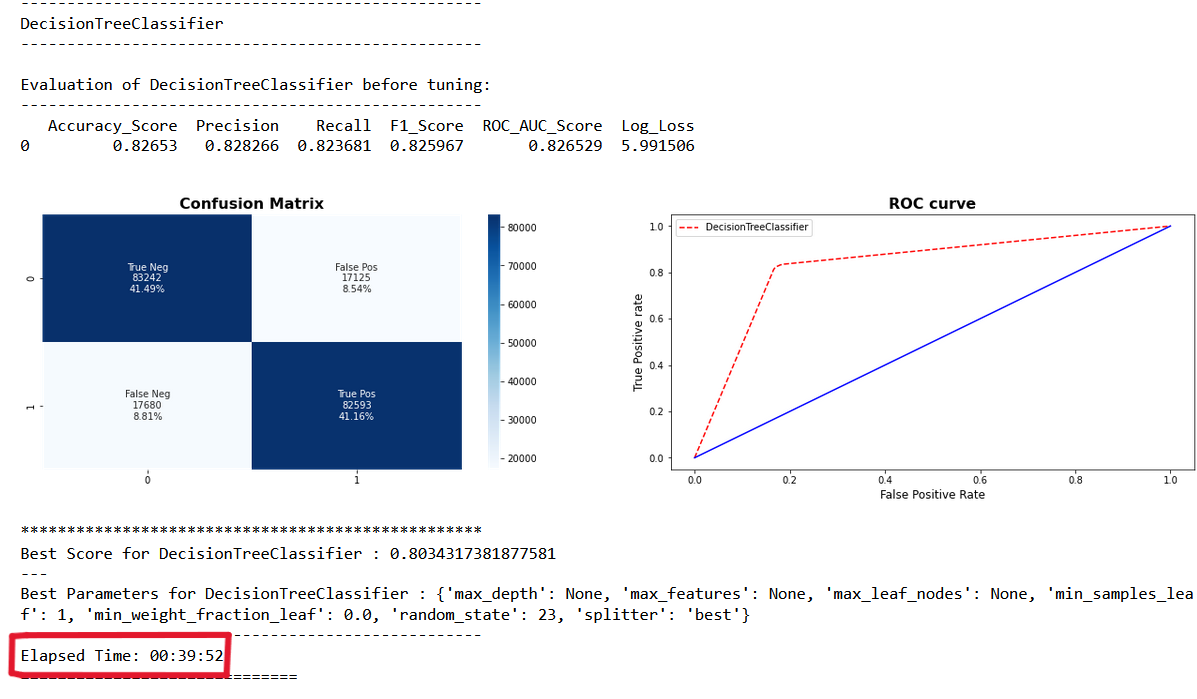

**DecisionTreeClassifier - RandomizedSearchCV:**

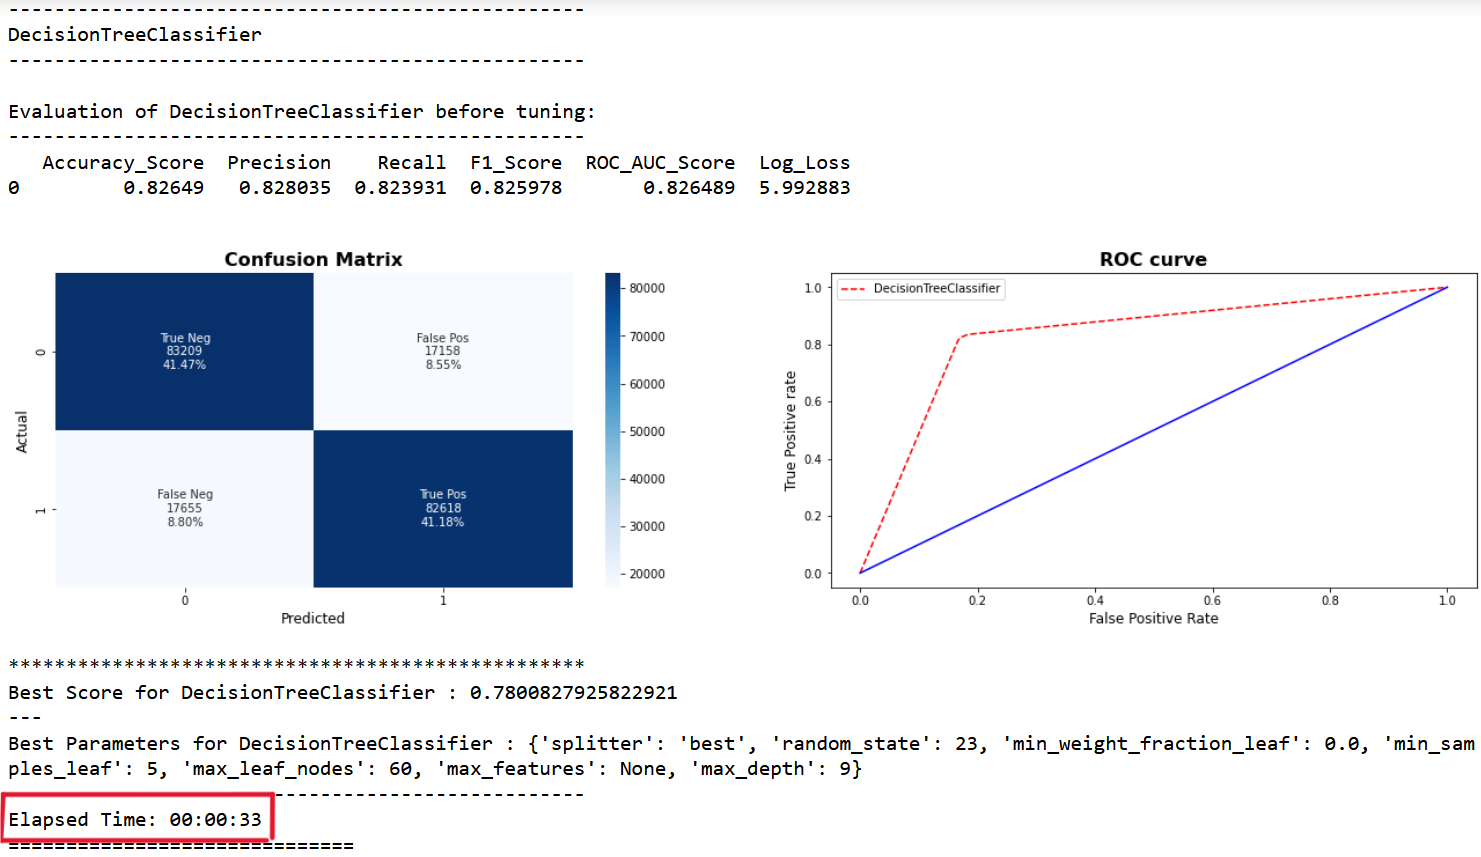

**DecisionTreeClassifer - HalvingRandomSearchCV**

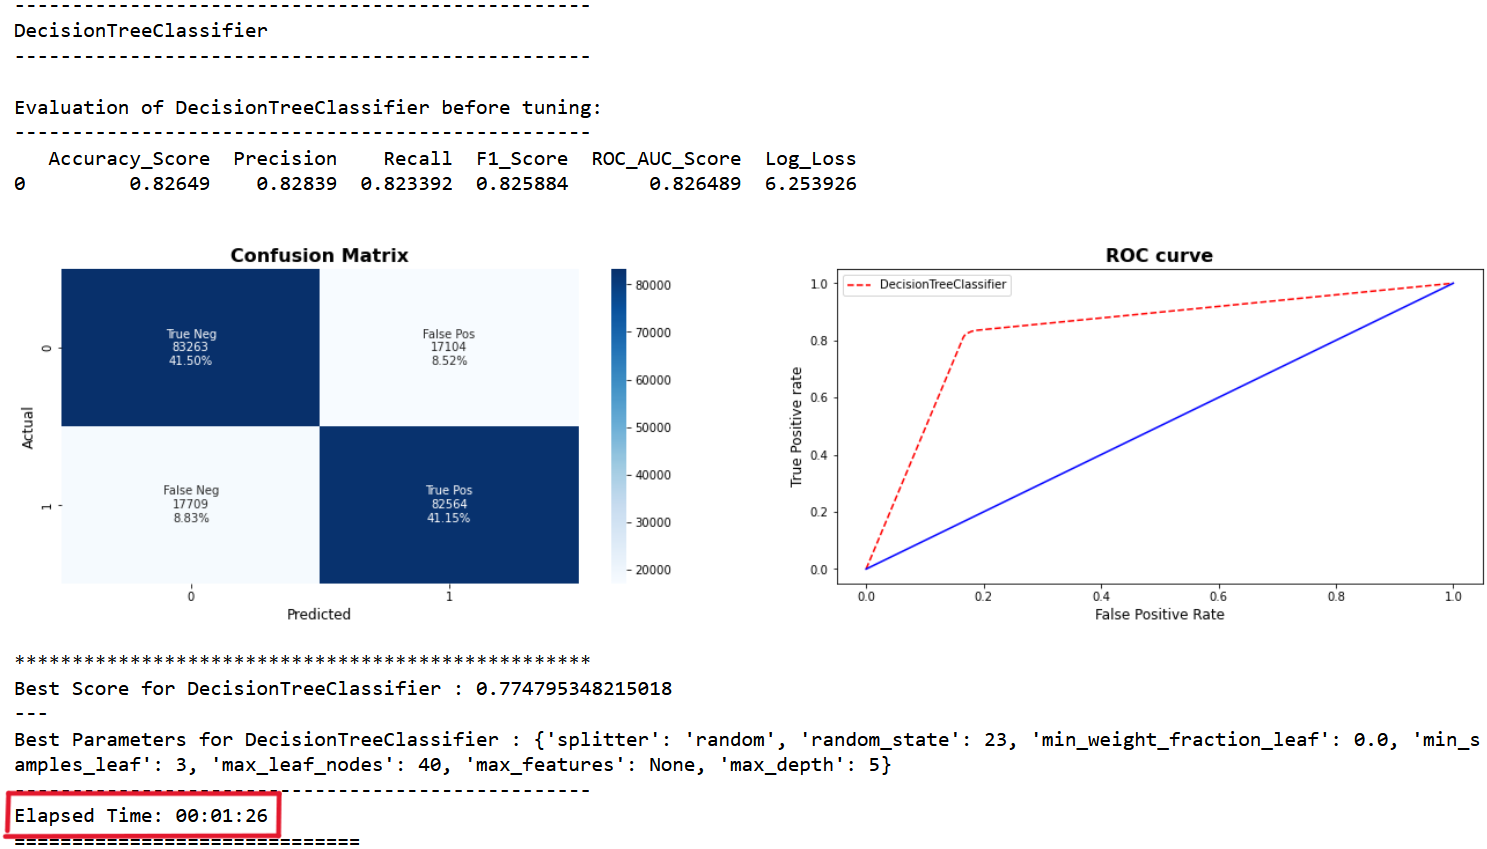

**AdaBoostClassifier - RandomizedSearchCV**

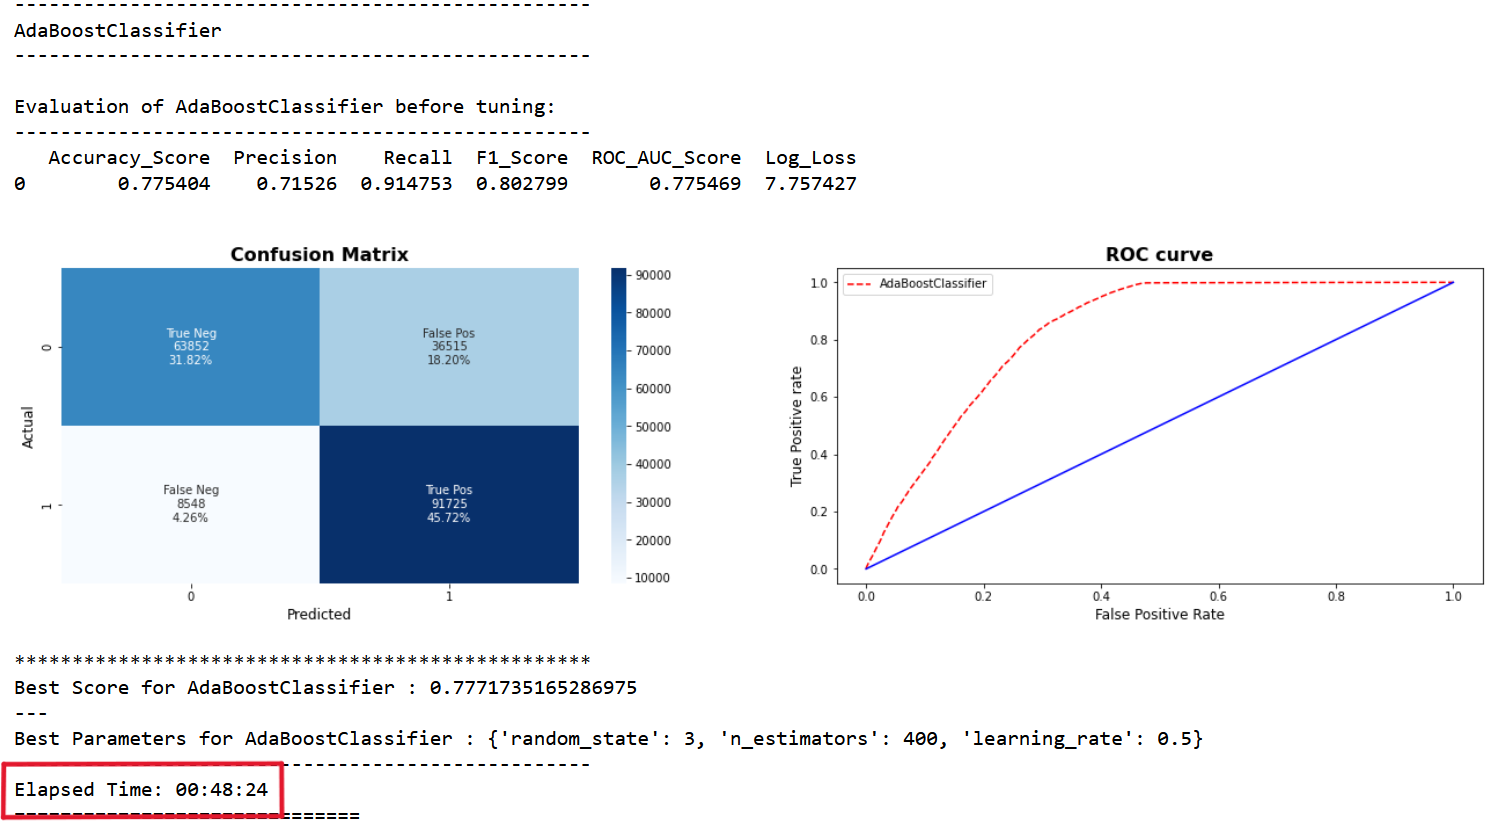

We can clearly see the time difference between the two models. Hence, we will go ahead with RandomizedSearchCV.

### ML Model - 1

**Function for Plotting Confusion Matrix and ROC Curve**

In [101]:
def plot_confusion_matrix_and_roc_curves(model, X_test, y_test, y_pred):

    fig, axes = plt.subplots(1,2, figsize=(22,5))

    # Confusion Matrix (CM)
    cm = confusion_matrix(y_test, y_pred)
    
    # Create CM labels
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    # Plot CM
    sns.heatmap(cm, ax = axes[0], annot=labels, fmt='',cmap='Blues')
    axes[0].set_title('Confusion Matrix', fontdict={'fontsize': 16, 'fontweight':'bold'})
    axes[0].set_xlabel('Predicted', fontdict={'fontsize': 12})
    axes[0].set_ylabel('Actual', fontdict={'fontsize': 12})
    
    
    # ROC Curve
    
    # predict probabilities
    pred_proba = model.predict_proba(X_test)

    # ROC curve for models
    fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)
       
    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

    plt.subplot(1, 2, 2)
    # plot roc curves
    plt.plot(fpr, tpr,linestyle='--',color='red', label = type(model).__name__)

    plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
    
    plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
    plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
    plt.ylabel('True Positive rate', fontdict={'fontsize': 12})

    plt.legend(loc='best')
    plt.show()


**Function for Model Evaluation Metrics**

In [102]:
def evaluation_metrics(name, y_pred, y_test):

    metrics_dict = {}
    metrics_dict['Accuracy_Score'] = [accuracy_score(y_test,y_pred)]  #Accuracy Score
    metrics_dict['Precision'] = [precision_score(y_test,y_pred)] #Precision
    metrics_dict['Recall'] = [recall_score(y_test,y_pred)] #Recall
    metrics_dict['F1_Score'] = [f1_score(y_test,y_pred)] #F1 Score
    metrics_dict['ROC_AUC_Score'] = [roc_auc_score(y_test, y_pred)] #ROC AUC Score
    metrics_dict['Log_Loss'] = [log_loss(y_test, y_pred)] #Log Loss

    metrics_df = pd.DataFrame(metrics_dict)

    print(metrics_df)

**Function for Hyper Parameter Tuning**

In [103]:
def hyperparameter_tuning(x_train, y_train, model, parameters, tuning_model):
    
    # Defining the hyper parameter tuning methods
    if tuning_model == 'Halving_Randomized_Search_CV':
        tuned_model = HalvingRandomSearchCV(model, param_distributions = parameters, scoring = "accuracy", n_jobs=2, factor=3, cv = 5 )
    
    elif tuning_model == 'Randomized_Search_CV':
        tuned_model = RandomizedSearchCV(model, param_distributions = parameters, scoring = 'accuracy', cv = 3, n_iter = 50, n_jobs=1)

    elif tuning_model == 'Grid_Search_CV':
        tuned_model = GridSearchCV(model, param_grid = parameters, scoring = 'accuracy', n_jobs=1, cv = 3)

    
    # Fit the model and calculate the time taken to fit the model
    start_time = time.time() 
    
    tuned_model.fit(x_train, y_train)
    
    stop_time = time.time()
    
    # Print the Best Score and Best Parameters
    print('*****'*10+f'\nBest Score for {type(model).__name__} : {tuned_model.best_score_}','\n---')
    print(f'Best Parameters for {type(model).__name__} : {tuned_model.best_params_}\n'+'-----'*10)
    
    # Print the Elapsed Time
    print('Elapsed Time:',time.strftime("%H:%M:%S", time.gmtime(stop_time - start_time)))
    print('======'*5)

    return tuned_model


**Function for ML Algorithm in action (Model Fitting, Hyperparameter Tuning, Evaluation - all combined)**

In [126]:
def perform_ml_algorithm(x_train, x_test, y_train, y_test, model, parameters, tuning_model):
    
    # Print the model name
    print('-----'*10+f'\n{type(model).__name__}\n'+'-----'*10)

    # Fit the model before tuning and calculate the time

    start_time = time.time() 
    
    model.fit(x_train, y_train) 
    
    stop_time = time.time()
    
    # Print the Elapsed Time
    print('Elapsed Time:',time.strftime("%H:%M:%S", time.gmtime(stop_time - start_time)))
    print('======'*5)
    
    # Make predictions
    untuned_pred = model.predict(x_test)

    # Evaluation Metrics before tuning
    print(f'\nEvaluation of {type(model).__name__} before tuning:\n'+'-----'*10)
    evaluation_metrics(type(model).__name__, untuned_pred, y_test)

    print()
    
    # Plot Confusion Matrix and ROC-AUC Curve before tuning
    plot_confusion_matrix_and_roc_curves(model, x_test, y_test, untuned_pred)

    # Hyper-parameter tuning
    tuned_model = hyperparameter_tuning(x_train, y_train, model, parameters, tuning_model)
    tuned_pred = tuned_model.predict(x_test)
  
    # Evaluation Metrics after tuning
    print(f'\nEvaluation of {type(model).__name__} after tuning:\n'+'-----'*10)
    evaluation_metrics(type(model).__name__, tuned_pred, y_test)

    print()
    
    # Plot Confusion Matrix and ROC-AUC Curve after tuning
    plot_confusion_matrix_and_roc_curves(tuned_model.best_estimator_, x_test, y_test, tuned_pred)

**Function for ML Algorithm Implementation - The one function to be called for all models**

In [105]:
def ml_algorithm_implementation(X, y, model, parameters, tuning_model, feature_importance = False):

    if feature_importance == False:
        print('########'*8+'\n     <<<< '+f'Tuning Model: {tuning_model}'+' >>>>\n'+'********'*8)

#     x = df.drop('Response', axis=1)
#     y = df['Response']

    # Train Test Split             
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

    if feature_importance == True:
        model.fit(x_train, y_train)
        return x_train, y_train, model

    perform_ml_algorithm(x_train, x_test, y_train, y_test, model, parameters, tuning_model)

Let's start with training all the different models.

**Decision Tree**

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
DecisionTreeClassifier
--------------------------------------------------
Elapsed Time: 00:00:10

Evaluation of DecisionTreeClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision   Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.826814   0.828482  0.82407   0.82627       0.826813  6.242249



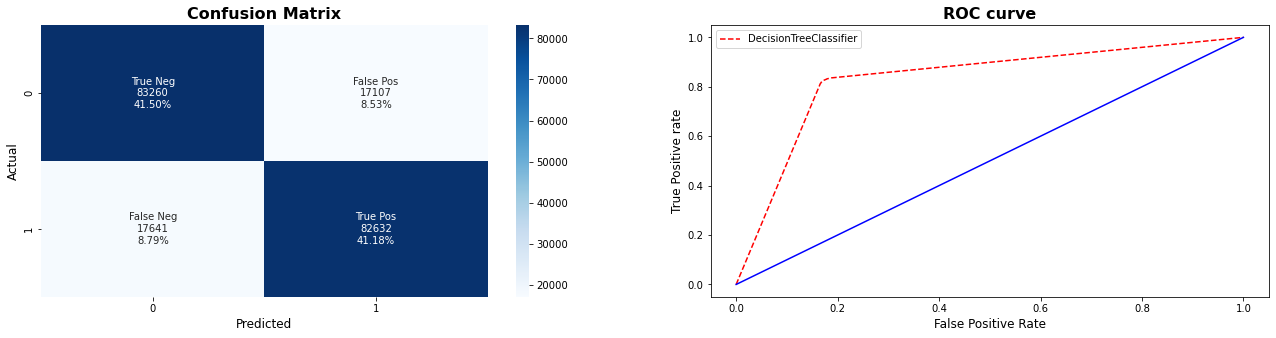

**************************************************
Best Score for DecisionTreeClassifier : 0.775138226240897 
---
Best Parameters for DecisionTreeClassifier : {'splitter': 'random', 'random_state': 23, 'min_weight_fraction_leaf': 0.0, 'min_samples_leaf': 1, 'max_leaf_nodes': 40, 'max_features': None, 'max_depth': 5}
--------------------------------------------------
Elapsed Time: 00:01:26

Evaluation of DecisionTreeClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.777108    0.72698  0.887198  0.799138        0.77716  8.033833



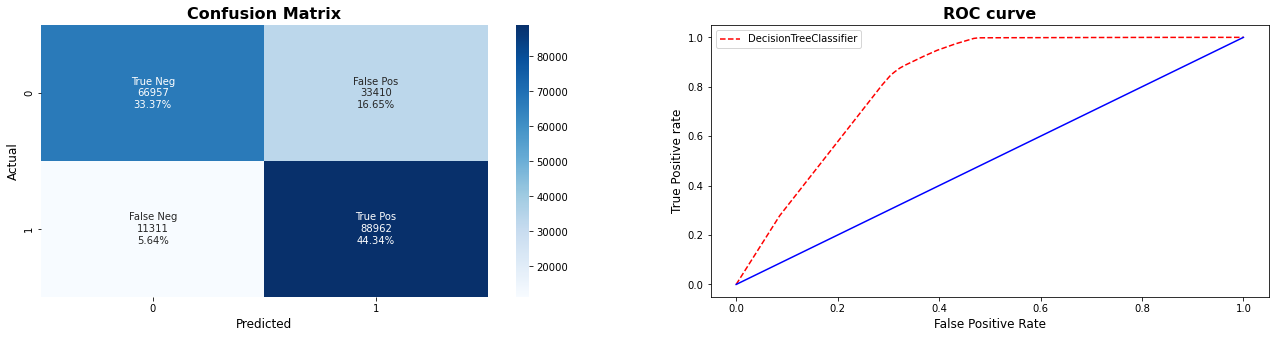

In [128]:
# Function Inputs:
X = X_resampled
y = y_resampled

model = DecisionTreeClassifier()

parameters_decision_tree = {"splitter":["best","random"],
            "max_depth" : [None,5,7,9],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0.0, 0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,30,40,50,60], 
           'random_state':[23]}

tuning_model = "Halving_Randomized_Search_CV"

# Train the Model
ml_algorithm_implementation(X=X, y=y, model=model, parameters=parameters_decision_tree,\
                            tuning_model=tuning_model, feature_importance=False)

In [107]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [108]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [109]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

**Logistic Regression**

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
LogisticRegression
--------------------------------------------------
Elapsed Time: 00:00:00

Evaluation of LogisticRegression before tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.773659   0.717409  0.902676  0.799449        0.77372  8.158146



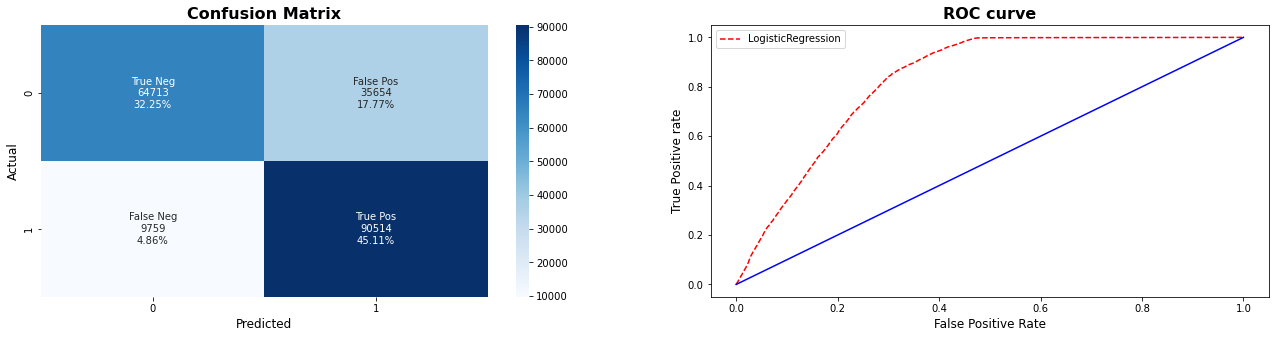

**************************************************
Best Score for LogisticRegression : 0.7453271028037383 
---
Best Parameters for LogisticRegression : {'solver': 'liblinear', 'random_state': 2, 'penalty': 'l2', 'C': 100}
--------------------------------------------------
Elapsed Time: 00:00:06

Evaluation of LogisticRegression after tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.773176   0.716672  0.903214  0.799202       0.773237  8.175571



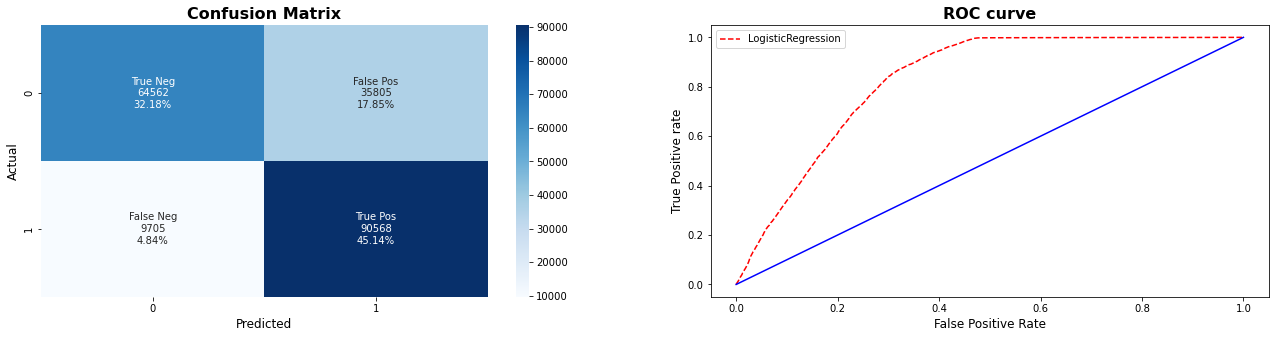

In [127]:
# Function Inputs:
X = X_resampled
y = y_resampled

model = LogisticRegression()

parameters_logistic = {'solver' : ['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
                        'penalty' : ['l2'],
                        'C' : [100, 10, 1.0, 0.1, 0.01, 0.001], 
                       'random_state':[2]}

tuning_model = "Halving_Randomized_Search_CV"

# Train the Model
ml_algorithm_implementation(X=X, y=y, model=model, parameters=parameters_logistic,\
                            tuning_model=tuning_model, feature_importance=False)

**K-Nearest Neighbors (KNN)**

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
KNeighborsClassifier
--------------------------------------------------
Elapsed Time: 00:00:00

Evaluation of KNeighborsClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.823475   0.776938  0.907263  0.837058       0.823514   6.36261



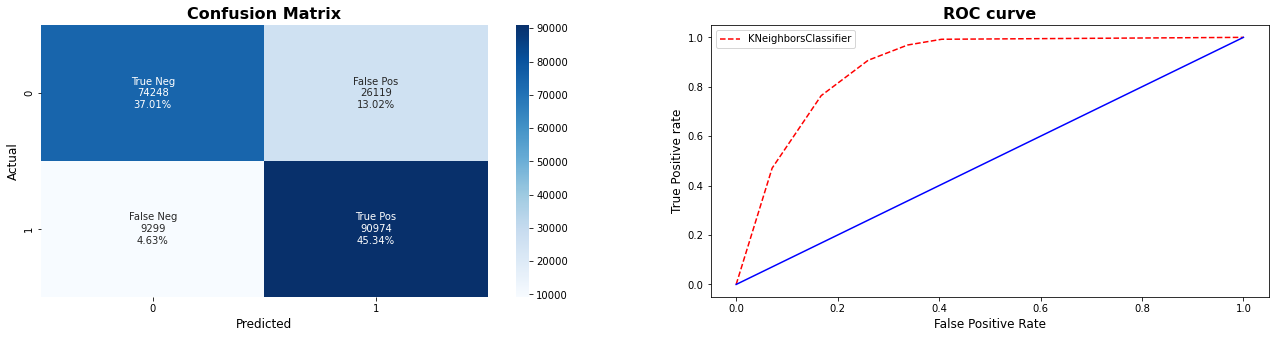

**************************************************
Best Score for KNeighborsClassifier : 0.503030303030303 
---
Best Parameters for KNeighborsClassifier : {'weights': 'distance', 'n_neighbors': 3, 'metric': 'euclidean', 'algorithm': 'auto'}
--------------------------------------------------
Elapsed Time: 00:00:05

Evaluation of KNeighborsClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.831973   0.804539  0.876806  0.839119       0.831994  6.056318



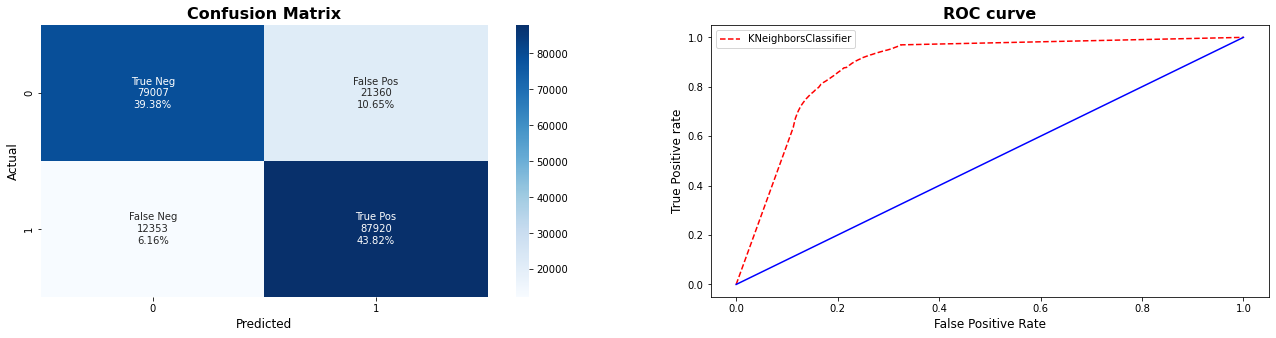

In [130]:
# Function Inputs:
X = X_resampled
y = y_resampled

model = KNeighborsClassifier()

parameters_knn = {'n_neighbors':[3, 5, 10, 50],
              'weights': ['distance'],
              'algorithm': ['auto'],
              'metric': ['euclidean', 'manhattan']}

tuning_model = "Halving_Randomized_Search_CV"

# Train the Model
ml_algorithm_implementation(X=X, y=y, model=model, parameters=parameters_knn,\
                            tuning_model=tuning_model, feature_importance=False)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [111]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [112]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

**ADA Boost Classifier**

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
AdaBoostClassifier
--------------------------------------------------
Elapsed Time: 00:00:19

Evaluation of AdaBoostClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.775404    0.71526  0.914753  0.802799       0.775469  8.095271



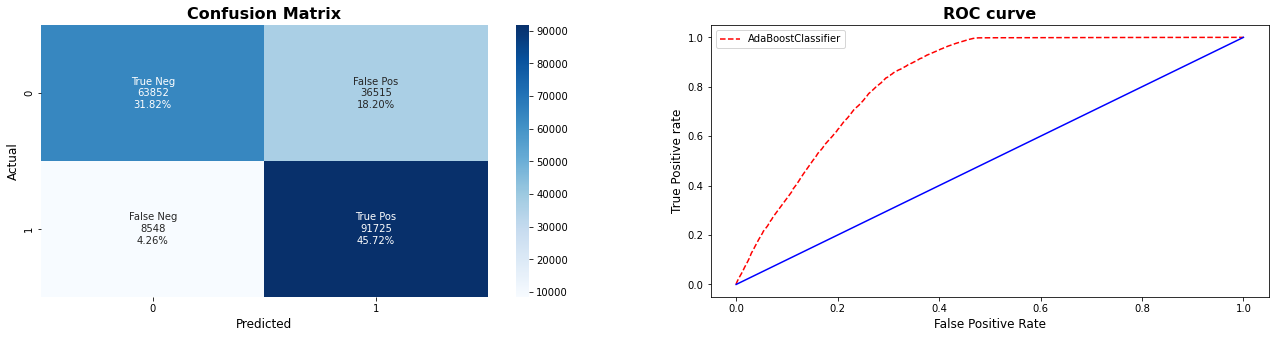

**************************************************
Best Score for AdaBoostClassifier : 0.7926984126984127 
---
Best Parameters for AdaBoostClassifier : {'random_state': 3, 'n_estimators': 10, 'learning_rate': 0.01}
--------------------------------------------------
Elapsed Time: 00:00:30

Evaluation of AdaBoostClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.760028   0.676066  0.998035  0.806089       0.760139  8.649471



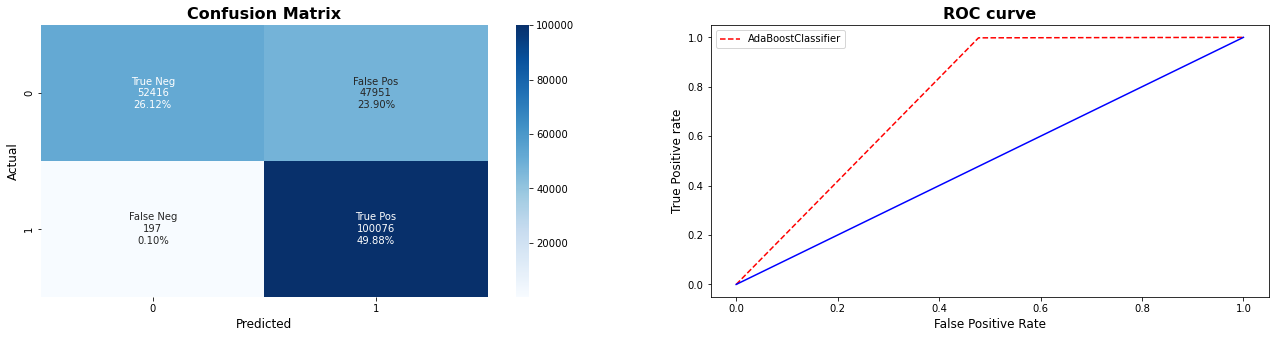

In [129]:
# Function Inputs:
X = X_resampled
y = y_resampled

model = AdaBoostClassifier()

parameters_ada = {'n_estimators':[10, 100, 200,400],
              'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.5],
              'random_state':[3]}

tuning_model = "Halving_Randomized_Search_CV"

# Train the Model
ml_algorithm_implementation(X=X, y=y, model=model, parameters=parameters_ada,\
                            tuning_model=tuning_model, feature_importance=False)

In [114]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [115]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [116]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

**Random Forest Classifier**

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
RandomForestClassifier
--------------------------------------------------
Elapsed Time: 00:01:53

Evaluation of RandomForestClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.832292   0.805239  0.876397  0.839313       0.832312  6.044821



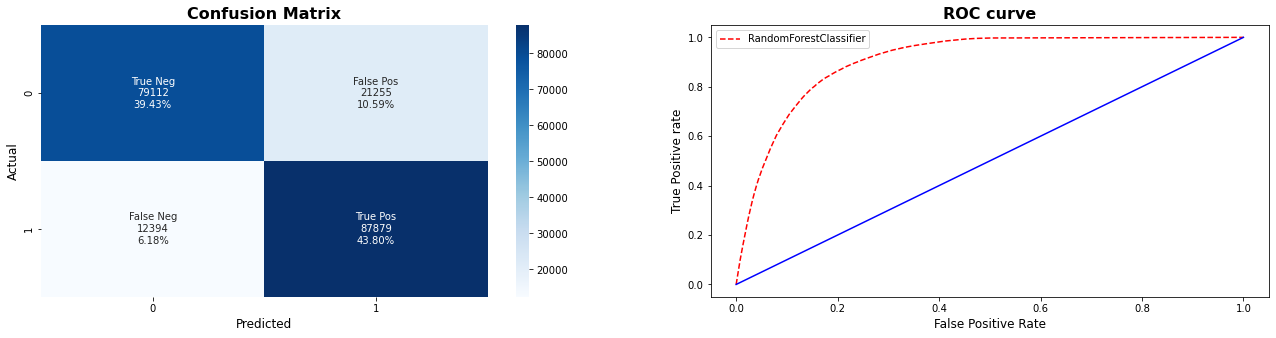

**************************************************
Best Score for RandomForestClassifier : 0.7242424242424244 
---
Best Parameters for RandomForestClassifier : {'random_state': 5, 'n_estimators': 200}
--------------------------------------------------
Elapsed Time: 00:03:55

Evaluation of RandomForestClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.833104   0.805217  0.878581  0.840301       0.833125  6.015539



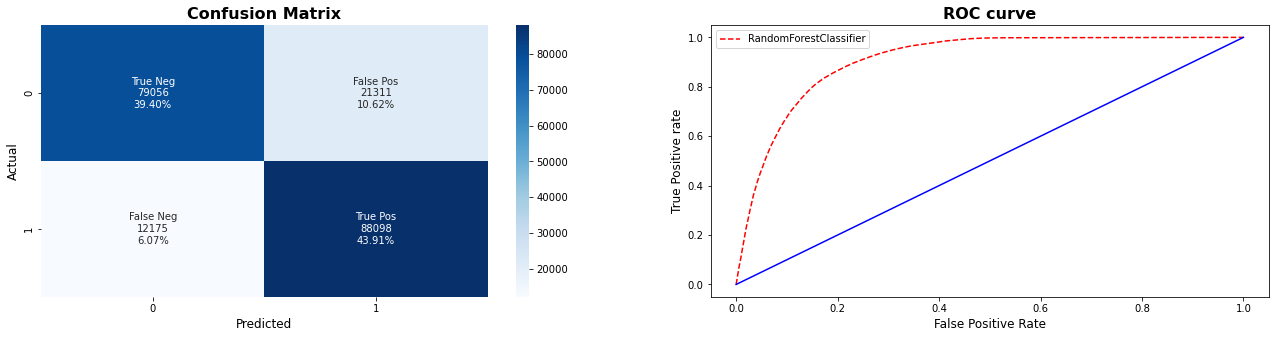

In [131]:
# Function Inputs:
X = X_resampled
y = y_resampled

model = RandomForestClassifier()

parameters_random_forest = {'n_estimators':[10, 100, 200,400],
              'random_state':[5]}

tuning_model = "Halving_Randomized_Search_CV"

# Train the Model
ml_algorithm_implementation(X=X, y=y, model=model, parameters=parameters_random_forest,\
                            tuning_model=tuning_model, feature_importance=False)

Below is a comparision score chart of all the models before and after tuning:

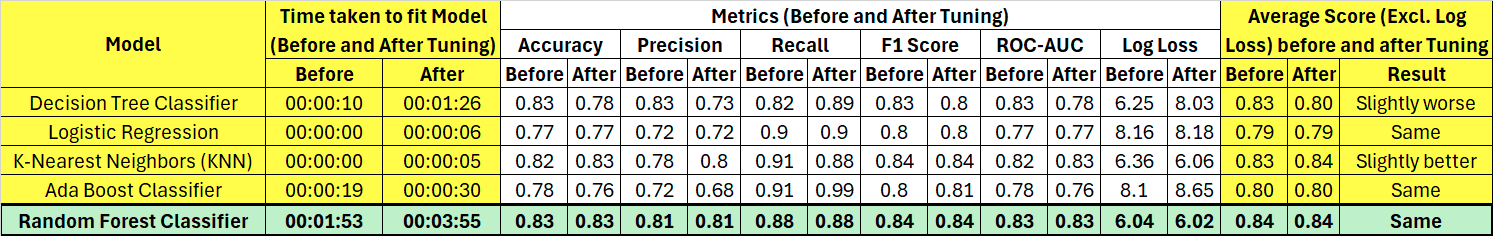

Note: We can see that the average score of all models before and after tuning is almost the same. Therefore, based on the current selection of hyperparameters, the tuning does not help to improve the performance of the model in a big way and hence, we can fit the model as is with the default parameters.

Based on the highest average score, we can choose **"Random Forest Classifier"** as the best model. Even though the time taken by Random Forest Classifier is slightly higher than other models like Decision Tree Classifier and KNN which have a similar average score, we choose it as it is an ensemble method, less prone to overfitting and is more robust.
However, it should be noted that depending on the computational resources and other technical requirements, a choice can be made between any of above models with further fine tuned hyperparameters.

**Model Selection:
Based on the above performance comparison, we choose "Random Forest Classifier" with its default parameters as the classification algorithm for our dataset.**


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Function to Plot the Feature Importance Plot**

In [176]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (15, 6))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.2, align="center", color = 'lightgreen', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.2, np.cumsum(values), width = 0.2, align = "center", color = 'green', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()


**Function to calculate and plot Feature Importance (combined)**

In [177]:
def show_feature_importance():
    x_train, y_train, model = ml_algorithm_implementation(X_resampled, y_resampled, RandomForestClassifier(), None, None, True) 
    
    importances = np.mean([
        tree.feature_importances_ for tree in model.estimators_
        ], axis=0)
    feature_plot(importances, x_train, y_train)

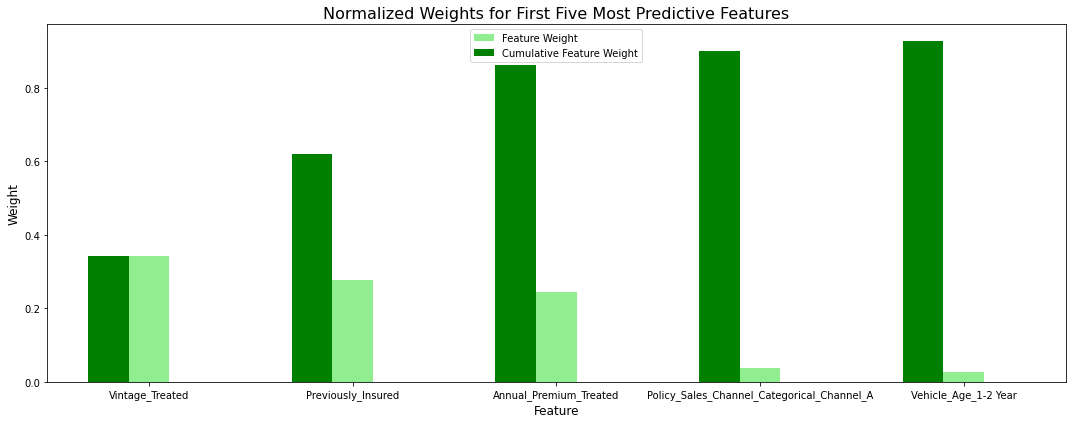

In [178]:
# Call the Feature Importance Function
show_feature_importance()

From the above plot, it can be observed that out of the top 5 most important features using by our model, the top 3 seem to be the most important viz:
1. Vintage_Treated
2. Previously_Insured
3. Annual_Premium_Treated

We can also verify this from the significant increase in the cumulative weights till Annual_Premium_Treated. After that the marginal increase in the cumulative weight is very less for the 4th and 5th feature.

In summary, we can conclude that the most important features for our classification task using the "Random Forest Classifier" model are:
1. Vintage_Treated
2. Previously_Insured
3. Annual_Premium_Treated

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [119]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [120]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***